
# Credit Card Churn Prediction
---  

## Project Description  
In this project, I will develop a machine learning model – specifically, **a custom neural network architecture built with PyTorch** – to predict the probability of a customer canceling their credit card service (*churn*). The model will follow a **supervised learning** approach, using a labeled dataset where:  
- **Customers who left the service** (*churn*) are labeled as **1**.  
- **Active customers** (*non-churn*) are labeled as **0**.  

---  

### CRISP-DM Methodology  
The project will follow the CRISP-DM (*Cross-Industry Standard Process for Data Mining*) framework:  

| **Stage** | **Objective** | **Key Actions** |  
|-----------|---------------|------------------|  
| **1. Business Understanding** | Define the impact of churn prediction on customer retention. | - Identify the causes and possible solutions for the business.<br>- Align metrics with business KPIs. |  
| **2. Data Understanding** | Analyze data structure, quality, and variable relationships. | - Exploratory Data Analysis (EDA).<br>- Outlier and correlation detection. |  
| **3. Data Preparation** | Prepare data for model training. | - Split training and test data.<br>- Remove redundant variables. |  
| **4. Modeling** | Train and compare classical models and neural networks. | - Random Forest/Logistic Regression (baseline).<br>- PyTorch neural network (focus on generalization). |  
| **5. Evaluation** | Validate performance with business-oriented metrics. | - AUC-ROC, Recall, confusion matrix.<br>- Simulate financial impact. |  
| **6. Deployment** | Deploy the model for production use. | - Build a final churn prediction model with customer behavior indicators. |  

*This notebook covers the Modeling, Evaluation, and Deployment stages.*  

---  


## Installs:

In [0]:
%pip install -r '../modeling_requeriments.txt'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.0/821.0 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.6/962.6 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [0]:
# Command to restart the kernel and update the installed libraries
%restart_python

## Imports:

In [0]:
# Data Loading and Modeling:
# Pandas
import pandas as pd

# Neural Networks:
# Torch
import torch

# Utils
import pickle

In [0]:
# SRC/ Functions Utils
import sys
sys.path.append('../src')
from data import DataSpark
from preprocessing import PreprocessingData
from visualization import GraphicsData
from sklearn_utils import SKLearn
from torch_utils import PyTorch

## Configs:

In [0]:
# Pandas:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


## 4. Modeling
---  
In this stage, **I will test classical machine learning models** to evaluate their performance on the training data. The approach will be **intentionally simple** (without complex hyperparameter tuning or advanced preprocessing techniques), as algorithms like **Random Forest, Logistic Regression, and SVM** typically perform better with straightforward data transformations.  

---  

After this initial analysis, **I will prioritize the project’s main model**: a **neural network developed in PyTorch**. This architecture was chosen due to its:  

- **Ability to identify complex patterns** in non-linear data.  
- **Flexibility to adapt to class imbalances** (e.g., the observed 84%-16% class distribution).  
- **Generalization capability** (Highly efficient with unseen data).  

However, neural networks require **specific preprocessing**, particularly to address:  
1. **High-cardinality categorical variables** (e.g., unique identifiers).  
2. **Asymmetric distributions** (identified during the EDA phase).  
3. **Data noise** (such as outliers in numerical variables).  

To address these, I will apply:  
- **Embedding layers** for categorical variables.  
- **Cross-validation** to verify and adjust data across different partitions.  
- **Regularization techniques** (e.g., *dropout*) to prevent *overfitting*.  

---  

### Modeling Split into Two Phases 
#### **Phase 1: Classical Machine Learning Models**  
| **Objective** | **Tools** | **Metric** |  
|---------------|------------|-------------|  
| Establish a performance baseline for future comparison. | Scikit-learn (Decision Trees, SVM, Logistic Regression). | AUC-ROC. |  

#### **Phase 2: PyTorch Neural Network**  
| **Objective** | **Tools** | **Metric** |  
|---------------|------------|-------------|  
| Achieve better generalization on unseen data. | PyTorch, Torchmetrics, Ray Tune. | AUC-ROC, Recall. |  

---  

### Evaluation Metric Choice: AUC-ROC 
#### Why AUC-ROC?  
| **Criterion** | **Explanation** | **Business Impact** |  
|---------------|------------------|----------------------|  
| **Class imbalance** | Balances *recall* (capturing churning customers) and *specificity* (avoiding unnecessary actions on loyal customers). | Reduces operational costs by prioritizing high-risk customers. |  
| **Asymmetric cost sensitivity** | False negatives (missing churn) are more critical than false positives. | Improves retention campaign efficacy (e.g., personalized offers). |  
| **Universal interpretability** | Scores above **0.85** indicate strong predictive power for binary classification. | Simplifies communication with non-technical stakeholders. |  

---  


#### Loading data train and data test

In [0]:
# File location and file type -- train
file_location  = '/Volumes/workspace/projects-data-science/churn-project-data/gold/train'
file_type = 'parquet'
train = DataSpark(spark = spark, file_location = file_location).load_data_pandas(file_type = file_type)

✅ File loaded successfully from: /Volumes/workspace/projects-data-science/churn-project-data/gold/train


In [0]:
# File location and file type -- train
file_location  = '/Volumes/workspace/projects-data-science/churn-project-data/gold/test'
file_type = 'parquet'
test = DataSpark(spark = spark, file_location = file_location).load_data_pandas(file_type = file_type)

✅ File loaded successfully from: /Volumes/workspace/projects-data-science/churn-project-data/gold/test


In [0]:
train.head()

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,churn_target
0,26,F,0,Graduate,Single,$40K - $60K,Blue,13,5,1,2,5655.0,0,0.842,2312,61,0.649,0.000,0
1,26,F,0,Graduate,Single,$40K - $60K,Blue,13,6,3,4,1643.0,1101,0.713,2152,50,0.471,0.670,0
2,26,F,0,Graduate,Single,$40K - $60K,Blue,17,5,3,3,3119.0,1328,0.722,2740,62,0.512,0.426,0
3,26,F,0,Graduate,Single,$40K - $60K,Blue,36,5,3,3,3930.0,0,0.758,2067,42,0.355,0.000,0
4,26,F,0,Graduate,Single,Less than $40K,Blue,19,2,1,2,3416.0,1109,0.783,4614,70,1.000,0.325,0


### Checking the dimensions of the training and test data

In [0]:
train.count()

customer_age                8074
gender                      8074
dependent_count             8074
education_level             8074
marital_status              8074
income_category             8074
card_category               8074
months_on_book              8074
total_relationship_count    8074
months_inactive_12_mon      8074
contacts_count_12_mon       8074
credit_limit                8074
total_revolving_bal         8074
total_amt_chng_q4_q1        8074
total_trans_amt             8074
total_trans_ct              8074
total_ct_chng_q4_q1         8074
avg_utilization_ratio       8074
churn_target                8074
dtype: int64

In [0]:
train.shape

(8074, 19)

In [0]:
test.count()

customer_age                2053
gender                      2053
dependent_count             2053
education_level             2053
marital_status              2053
income_category             2053
card_category               2053
months_on_book              2053
total_relationship_count    2053
months_inactive_12_mon      2053
contacts_count_12_mon       2053
credit_limit                2053
total_revolving_bal         2053
total_amt_chng_q4_q1        2053
total_trans_amt             2053
total_trans_ct              2053
total_ct_chng_q4_q1         2053
avg_utilization_ratio       2053
churn_target                2053
dtype: int64

In [0]:
test.shape

(2053, 19)

### Checking the distribution of the data to evaluate the preprocessing approaches in each of them

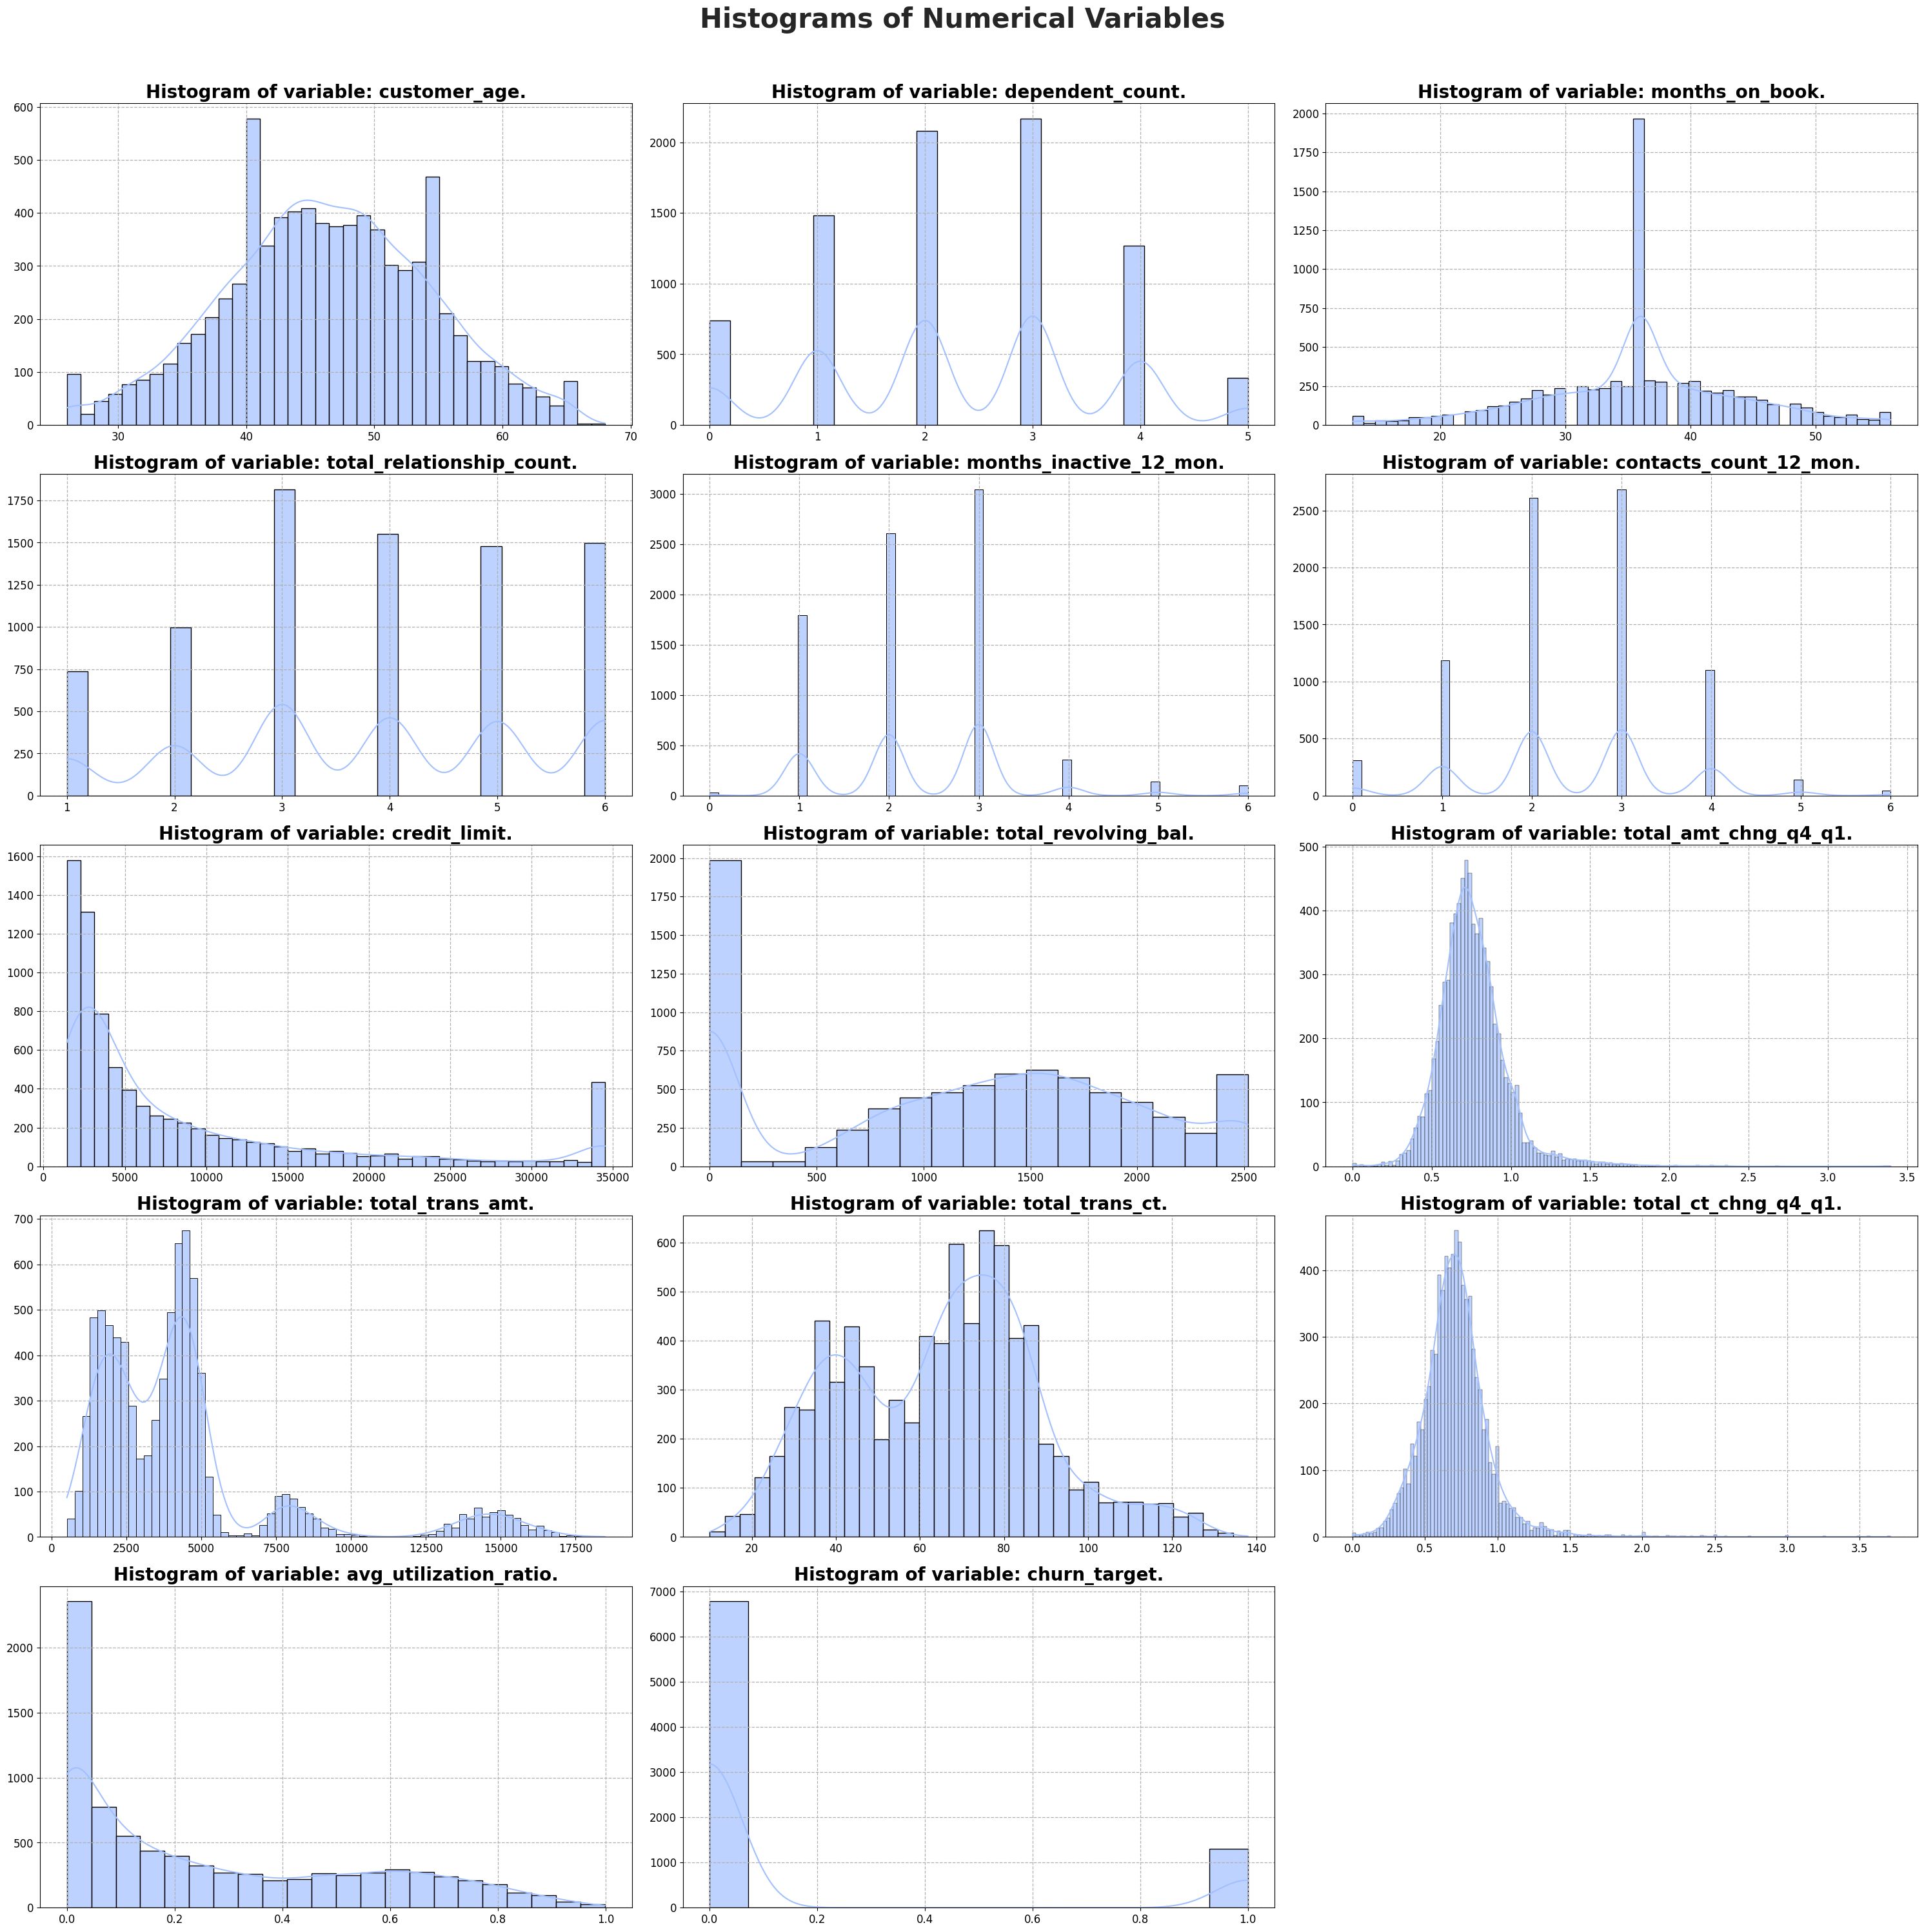

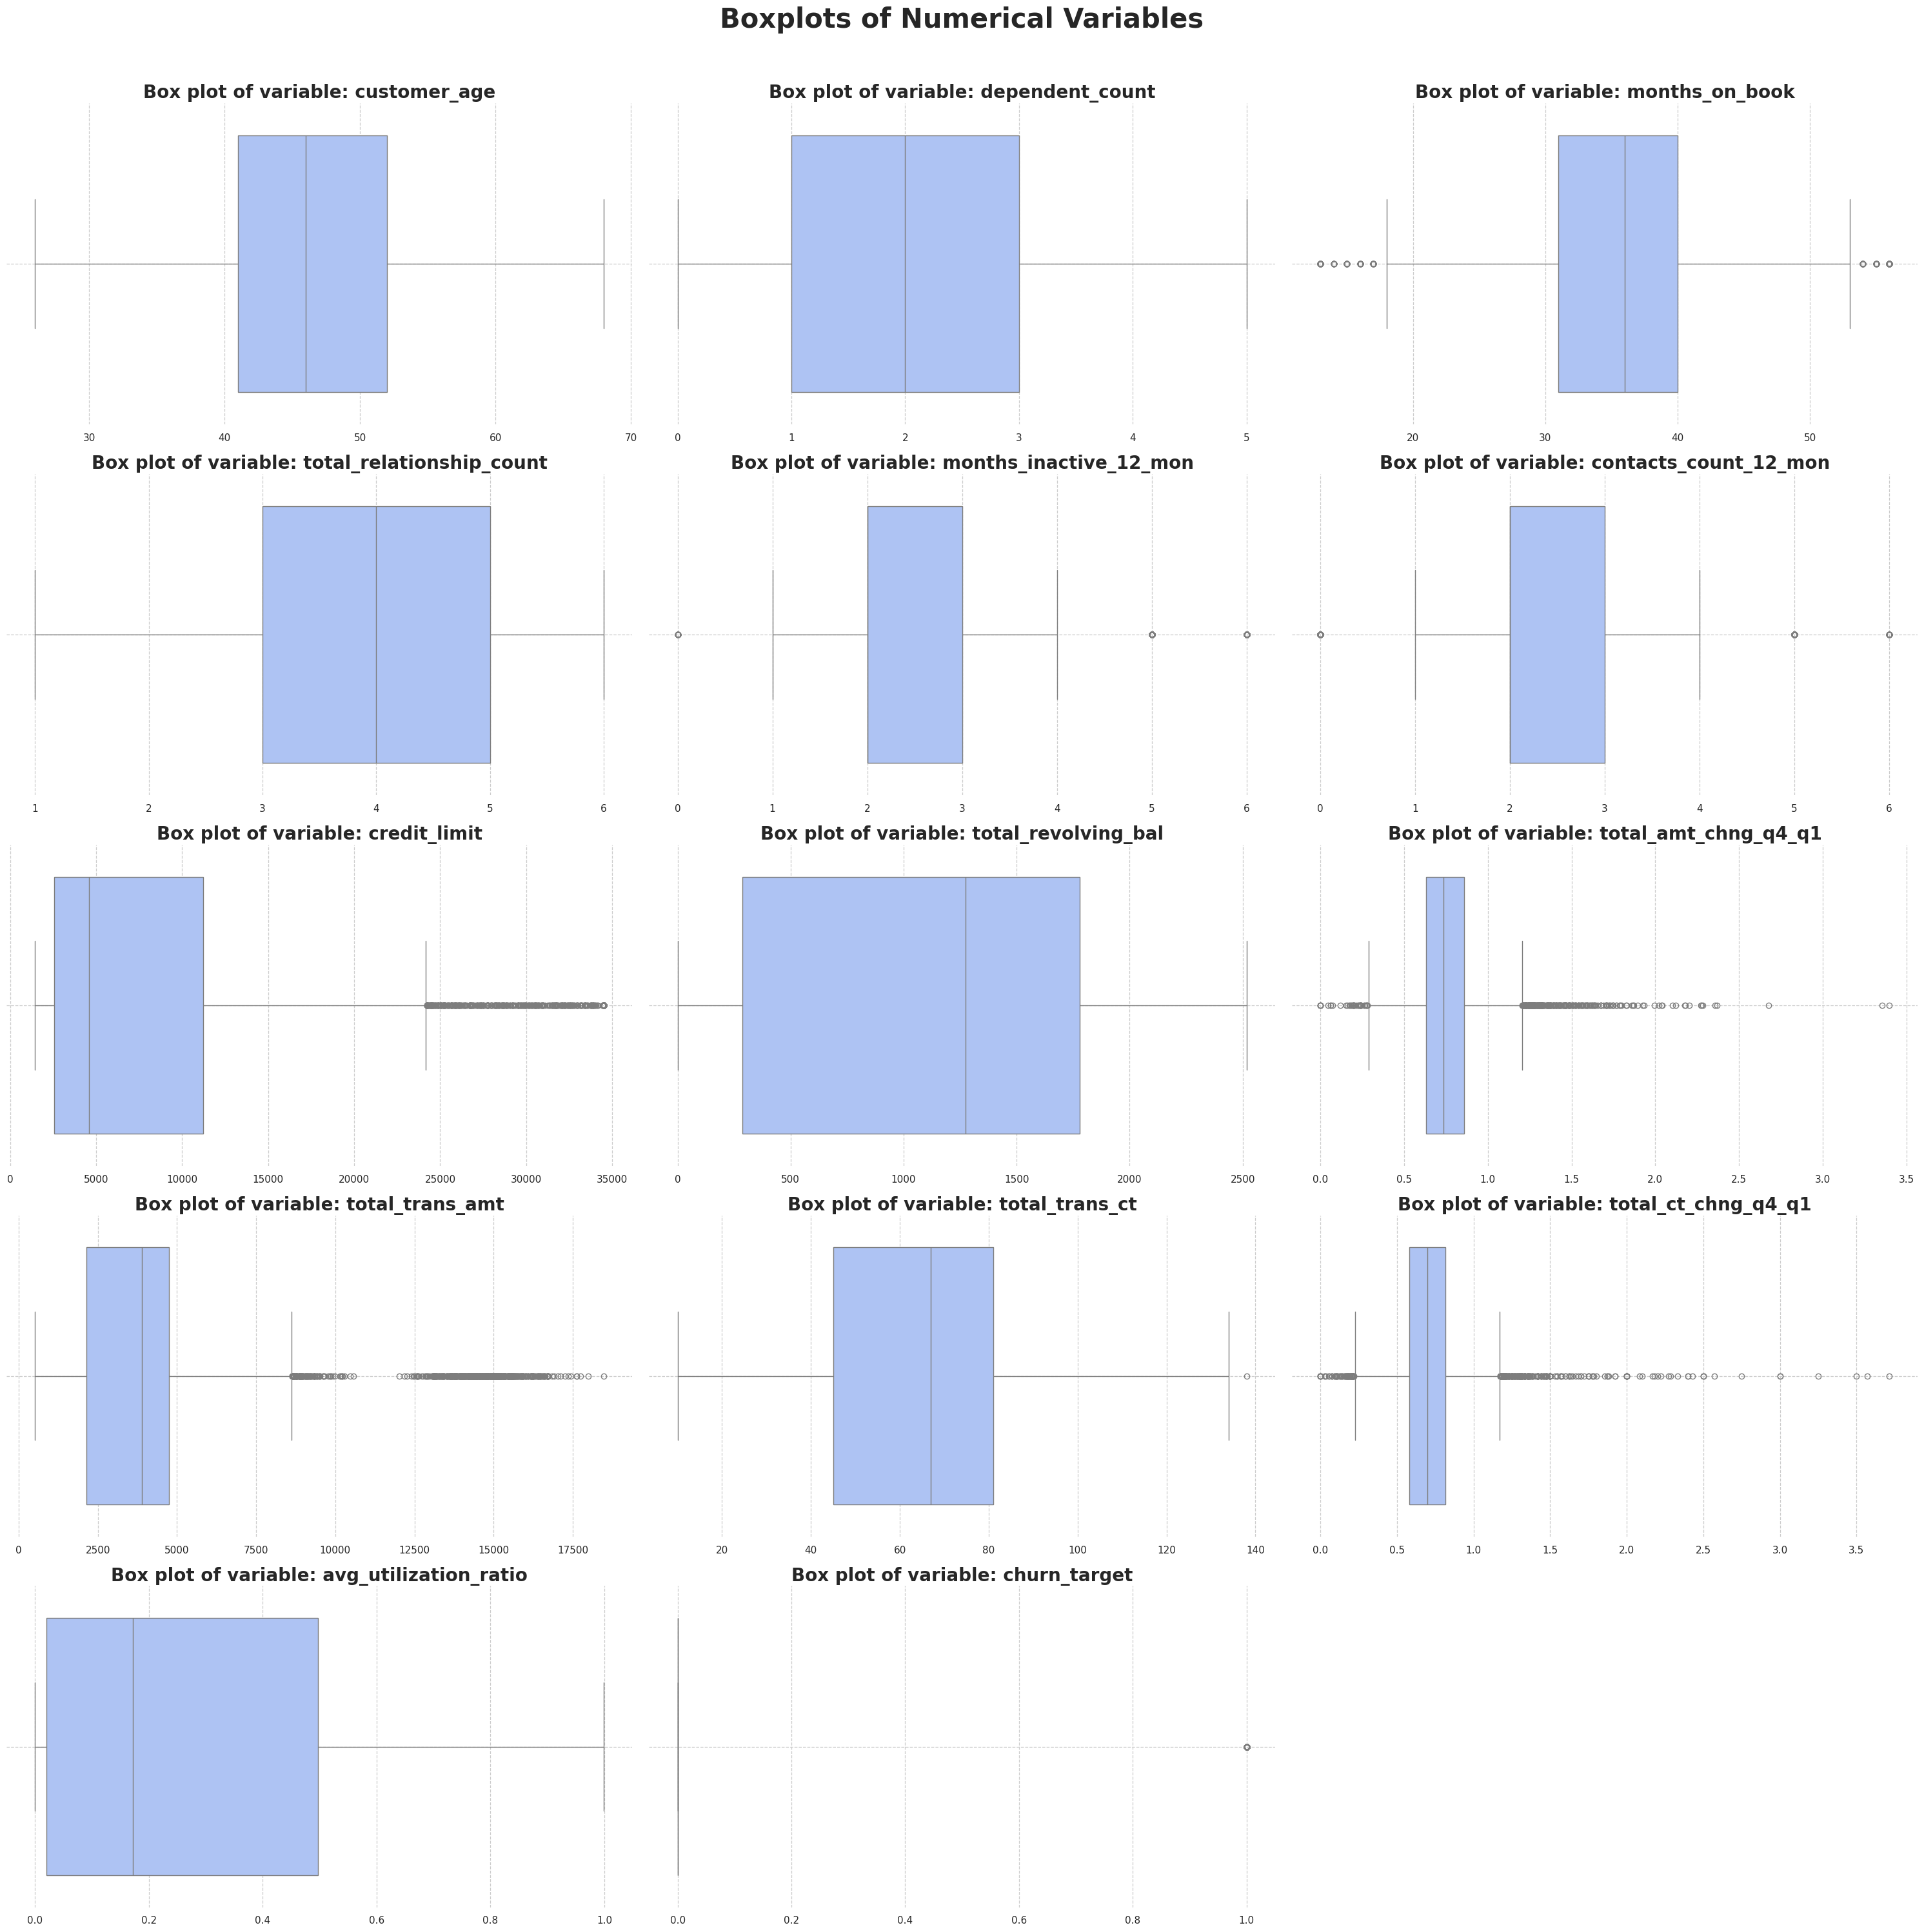

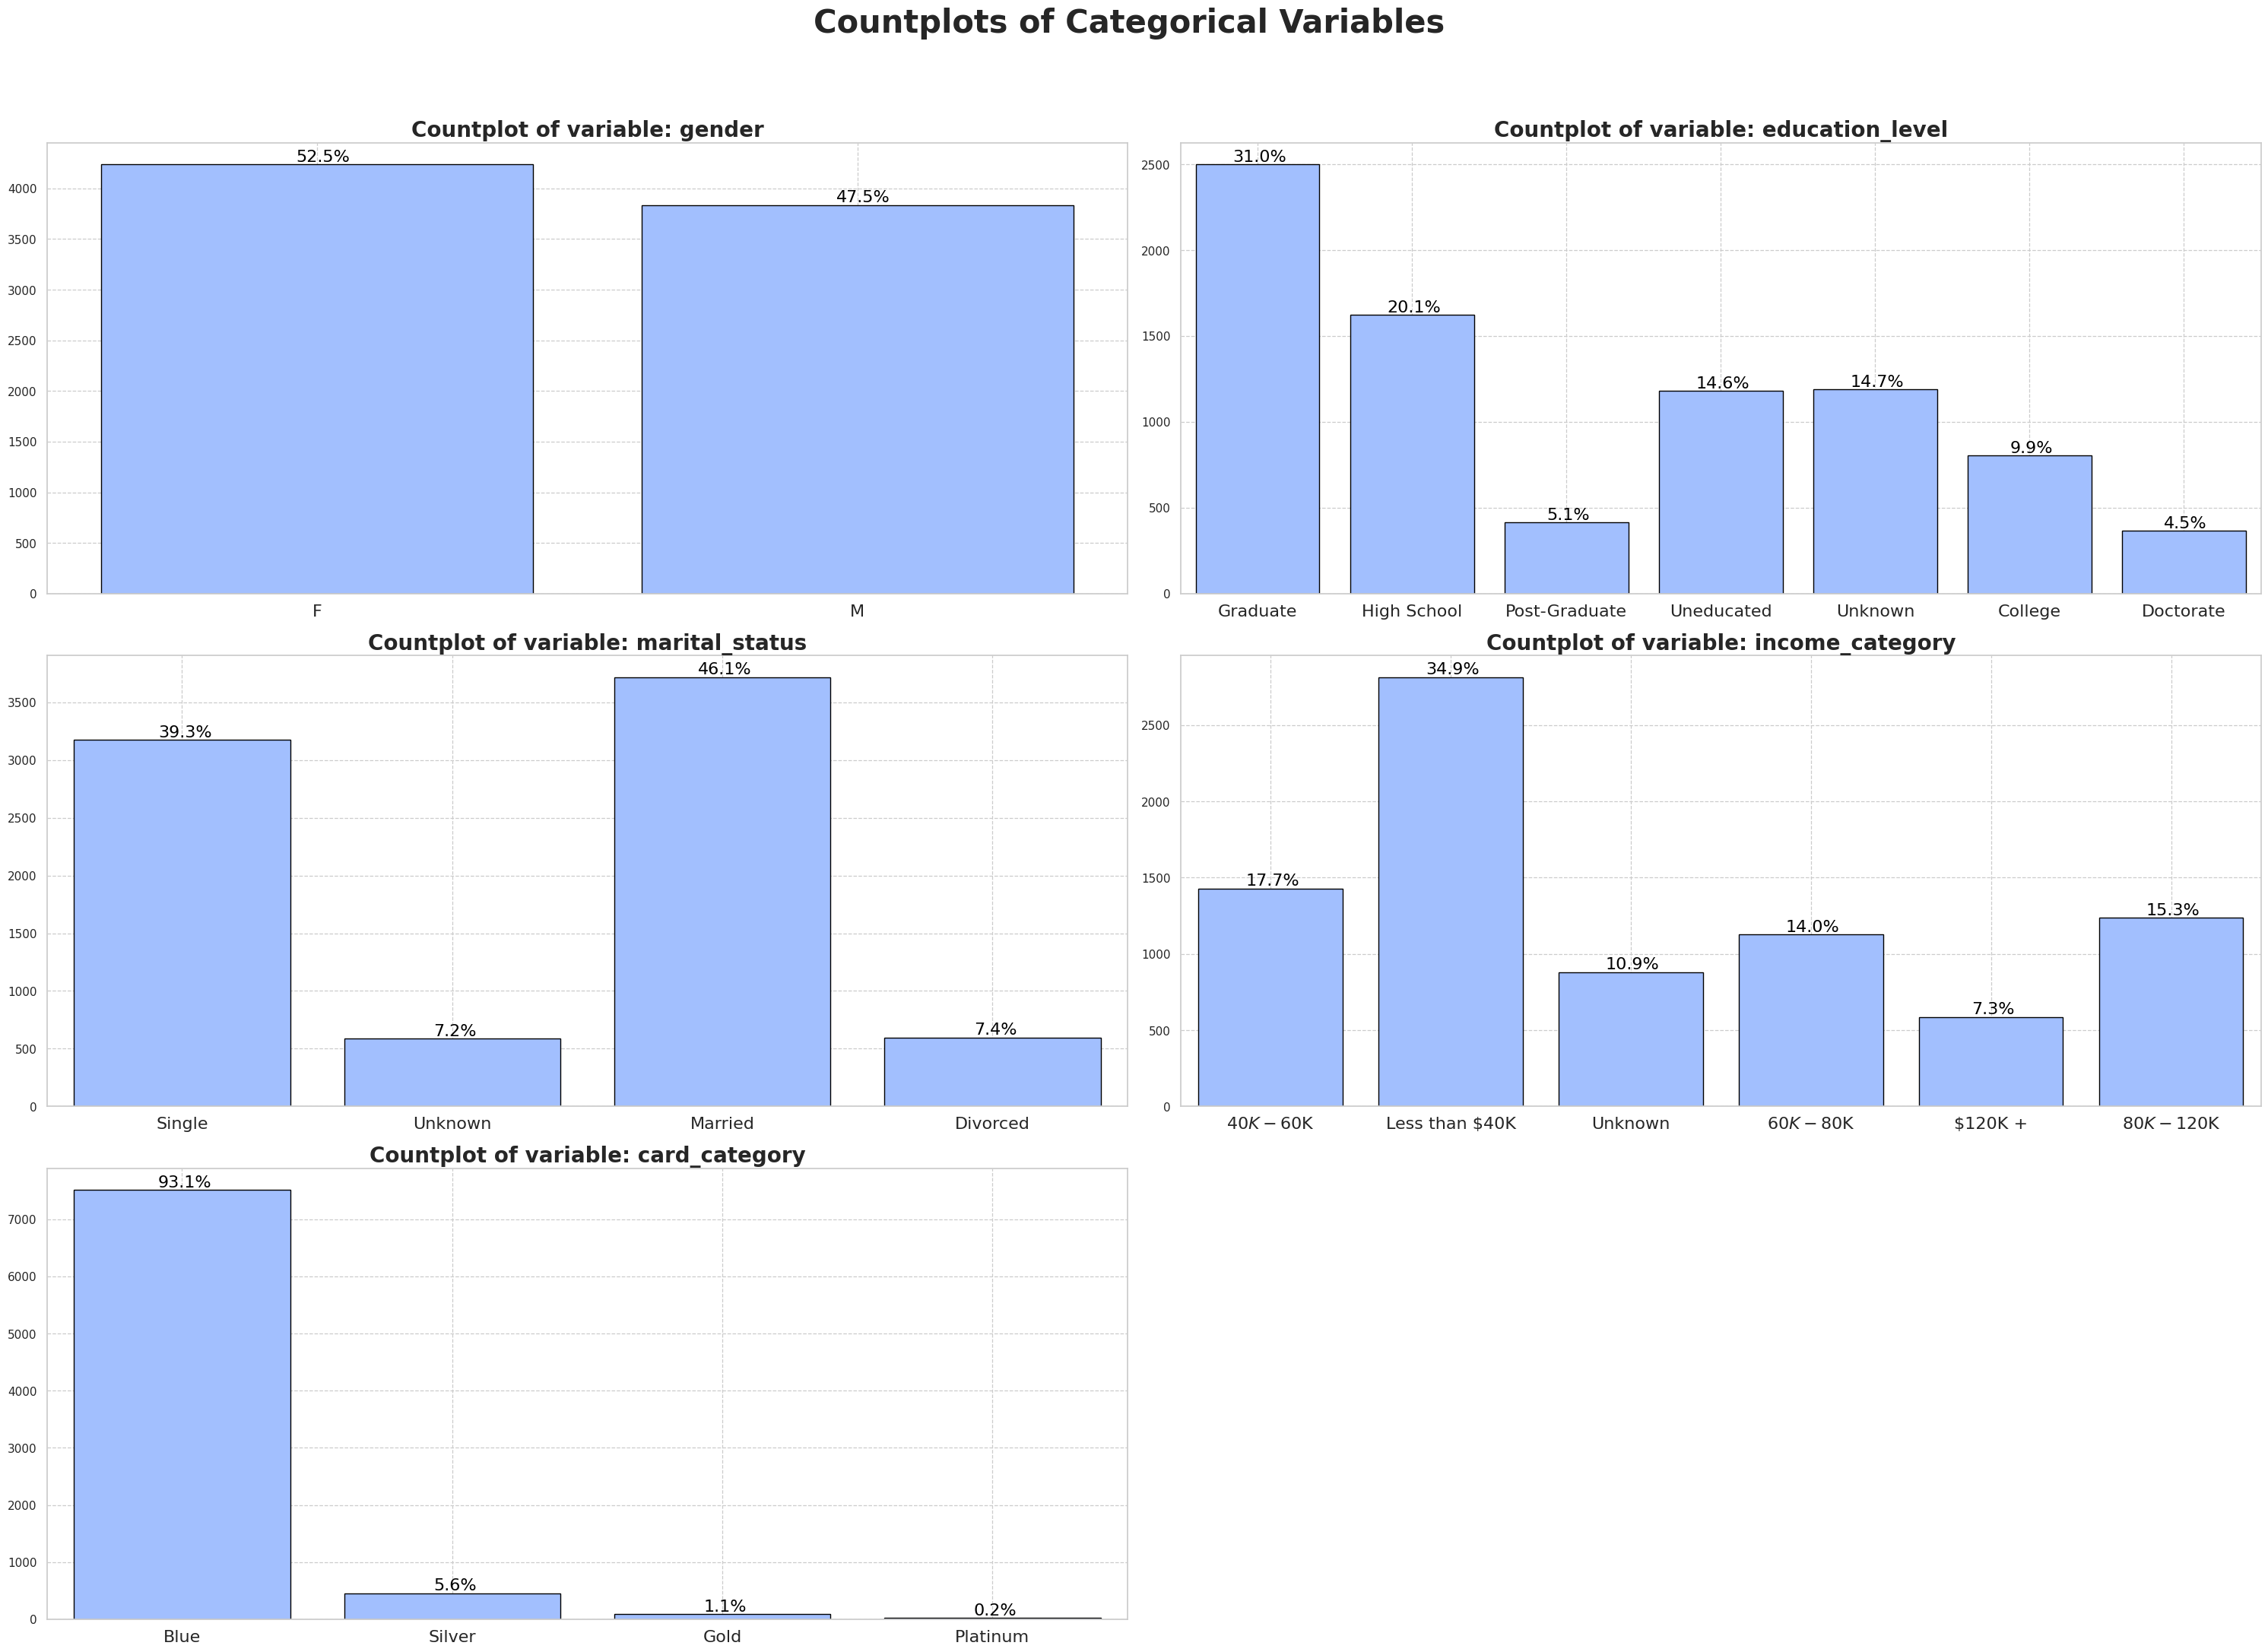

In [0]:
# Data collect
data_ax = train
# Initialize Graphics
graphics = GraphicsData(data_ax)
# Numerical Histograms
graphics.numerical_histograms()
# Numerical Boxplots
graphics.numerical_boxplots(showfliers = True)
# Categorical Countplots 
graphics.categorical_countplots()

### Training Classics Models - Cross-Validation

#### Separating features and labels

In [0]:
# Train
X_train = train.drop(columns = 'churn_target')
y_train = train['churn_target'].copy()
# Test 
X_test = test.drop(columns = 'churn_target')
y_test = test['churn_target'].copy()

# Checking the dimensions of the training and test data
print(f'The Train features dataset shape: {X_train.shape}')
print(f'The Train labels dataset shape: {y_train.shape}')
print(f'\nThe Test features dataset shape: {X_test.shape}')
print(f'The Test labels dataset shape: {y_test.shape}')

The Train features dataset shape: (8074, 18)
The Train labels dataset shape: (8074,)

The Test features dataset shape: (2053, 18)
The Test labels dataset shape: (2053,)



#### Data Preprocessing for Traditional ML Models  

Traditional ML algorithms benefit from features that share similar scales and distributions, ensuring stable convergence and fair weighting across predictors. For this, I adopted the following strategy:  

#### 1. Numerical Variables  

| **Technique**       | **Applied Variables**                                                                                                                                                                                                                             | **Justification**                                                                                     |
|---------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------|
| **StandardScaler**  | All numeric features (`credit_limit`, `total_amt_chng_q4_q1`, `total_ct_chng_q4_q1`, `avg_utilization_ratio`, `customer_age`, `dependent_count`, `months_on_book`, `total_relationship_count`, `months_inactive_12_mon`, `contacts_count_12_mon`, `total_revolving_bal`, `total_trans_amt`, `total_trans_ct`) | Removes the mean and scales to unit variance, aligning feature ranges and mitigating outlier influence. |

#### 2. Categorical Variables  

| **Technique**      | **Applied Variables**                                                    | **Justification**                                                                                   |
|--------------------|----------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| **OrdinalEncoder** | Ordinal features (`education_level`, `income_category`, `card_category`)   | Preserves inherent ordering without inflating dimensionality.                                       |
| **OneHotEncoder**  | Nominal features (`gender`, `marital_status`)                             | Encodes each category distinctly, avoiding implied ranking and maintaining model interpretability. |



In [0]:
ml_preprocessor = PreprocessingData().MLClassicPreprocessing()

In [0]:
ml_preprocessor

,transformers,"[('one_hot_features', ...), ('ordinal_features', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


In [0]:
X_train_preprocessed = ml_preprocessor.fit_transform(X_train)
pd.DataFrame(X_train_preprocessed, columns = ml_preprocessor.get_feature_names_out(X_train.columns)).head(10)

,one_hot_features__gender_F,one_hot_features__gender_M,one_hot_features__marital_status_Divorced,one_hot_features__marital_status_Married,one_hot_features__marital_status_Single,one_hot_features__marital_status_Unknown,ordinal_features__education_level,ordinal_features__income_category,ordinal_features__card_category,std_scaler_features__credit_limit,std_scaler_features__total_amt_chng_q4_q1,std_scaler_features__total_ct_chng_q4_q1,std_scaler_features__avg_utilization_ratio,std_scaler_features__customer_age,std_scaler_features__dependent_count,std_scaler_features__months_on_book,std_scaler_features__total_relationship_count,std_scaler_features__months_inactive_12_mon,std_scaler_features__contacts_count_12_mon,std_scaler_features__total_revolving_bal,std_scaler_features__total_trans_amt,std_scaler_features__total_trans_ct
0,1.0,0.0,0.0,0.0,1.0,0.0,0.816964,-0.065675,-0.251805,-0.332074,0.378887,-0.259428,-0.991094,-2.523913,-1.79301,-2.852409,0.764604,-1.317098,-0.413969,-1.421956,-0.613601,-0.159636
1,1.0,0.0,0.0,0.0,1.0,0.0,0.816964,-0.065675,-0.251805,-0.770567,-0.209919,-0.996280,1.452522,-2.523913,-1.79301,-2.852409,1.406331,0.648931,1.402052,-0.070447,-0.660774,-0.627724
2,1.0,0.0,0.0,0.0,1.0,0.0,0.816964,-0.065675,-0.251805,-0.609247,-0.168839,-0.826555,0.562608,-2.523913,-1.79301,-2.354256,0.764604,0.648931,0.494041,0.208202,-0.487415,-0.117083
3,1.0,0.0,0.0,0.0,1.0,0.0,0.816964,-0.065675,-0.251805,-0.520609,-0.004521,-1.476476,-0.991094,-2.523913,-1.79301,0.011969,0.764604,0.648931,0.494041,-1.421956,-0.685834,-0.968151
4,1.0,0.0,0.0,0.0,1.0,0.0,0.816964,-0.742888,-0.251805,-0.576787,0.109588,1.193579,0.194242,-2.523913,-1.79301,-2.105180,-1.160576,-1.317098,-0.413969,-0.060627,0.065093,0.223345
5,1.0,0.0,0.0,0.0,1.0,0.0,0.816964,-0.742888,-0.251805,-0.787727,-0.114067,0.808594,-0.991094,-2.523913,-1.79301,-1.731565,-0.518850,-1.317098,0.494041,-1.421956,0.041801,0.733986
6,1.0,0.0,0.0,0.0,0.0,1.0,0.816964,-0.742888,-0.251805,-0.713734,-0.807853,0.287002,2.284081,-2.523913,-1.79301,-2.727871,-0.518850,-0.334084,-1.321980,0.961905,-0.003897,-0.329850
7,1.0,0.0,0.0,1.0,0.0,0.0,-0.360818,-0.742888,-0.251805,-0.357540,0.607106,-0.147658,-0.531549,-2.523913,-1.79301,-2.229718,0.764604,0.648931,-0.413969,-0.584782,0.019689,-0.117083
8,1.0,0.0,0.0,0.0,1.0,0.0,-0.360818,-0.065675,-0.251805,-0.761058,-1.953513,-1.762109,2.415380,-2.523913,-1.79301,-2.852409,-1.160576,-0.334084,1.402052,0.561731,-1.039038,-1.606453
9,1.0,0.0,0.0,0.0,1.0,0.0,-0.360818,-0.065675,-0.251805,-0.496345,0.205440,-1.654479,-0.991094,-2.523913,-1.79301,0.011969,1.406331,0.648931,1.402052,-1.421956,-0.602103,-0.968151


Shape of train preprocessed

In [0]:
X_train_preprocessed.shape

(8074, 22)

#### Defining the models:

I chose to define the models and their parameters for training through cross-validation, considering class imbalance and preprocessing of the training data.

---

I chose the following models:

- **Logistic Regression**

- **Decision Tree**

- **Random Forest**

- **KNeighbors**

- **Support Vector Machine**

- **Gradient Boosting**

In [0]:
models = SKLearn().SKModels()
models

[('Logistic Regression',
  Pipeline(steps=[('model',
                   LogisticRegression(class_weight='balanced', random_state=33))])),
 ('Decision Tree Classifier',
  Pipeline(steps=[('model',
                   DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                                          min_impurity_decrease=0.001,
                                          random_state=33))])),
 ('Random Forest Classifier',
  Pipeline(steps=[('model',
                   RandomForestClassifier(class_weight='balanced', max_depth=10,
                                          random_state=33))])),
 ('KNeighbors Classifier',
  Pipeline(steps=[('model', KNeighborsClassifier(weights='distance'))])),
 ('Support Vector Machine Classifier',
  Pipeline(steps=[('model',
                   SVC(class_weight='balanced', probability=True,
                       random_state=33))])),
 ('Gradient Boosting Classifier',
  Pipeline(steps=[('model',
                   GradientBoostingClassifier

#### Applying Cross Validation

In [0]:
SKLearn().CrossValidationML(
    models = models,
    x_train = X_train_preprocessed,
    y_train = y_train,
    n_splits = 5,
    random_state = 10,
    shuffle = True,
    scoring = 'roc_auc',  
)

##############################
✅ Logistic Regression: 
🎯 AUC ROC Mean: 0.923977 
🟣 STD Metrics: 0.006618

##############################
✅ Decision Tree Classifier: 
🎯 AUC ROC Mean: 0.946035 
🟣 STD Metrics: 0.005513

##############################
✅ Random Forest Classifier: 
🎯 AUC ROC Mean: 0.982679 
🟣 STD Metrics: 0.001795

##############################
✅ KNeighbors Classifier: 
🎯 AUC ROC Mean: 0.897667 
🟣 STD Metrics: 0.006609

##############################
✅ Support Vector Machine Classifier: 
🎯 AUC ROC Mean: 0.963490 
🟣 STD Metrics: 0.002604

##############################
✅ Gradient Boosting Classifier: 
🎯 AUC ROC Mean: 0.991834 
🟣 STD Metrics: 0.001530




### Training Neural NetWorks Models With PyTorch - Cross Validation

#### Data Preprocessing for Neural Network Models  

Neural networks benefit from feature scaling and encoding strategies that normalize value ranges and preserve meaningful relationships between categories, contributing to stable and efficient training. Based on this, I adopted the following preprocessing strategy:  

---

#### 1. Numerical Variables  

| **Technique**    | **Applied Variables**                                                                                                                                                                                        | **Justification**                                                                                                                |
|------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------|
| **MinMaxScaler** | `months_on_book`, `customer_age`, `dependent_count`, `total_relationship_count`, `months_inactive_12_mon`, `contacts_count_12_mon`, `total_revolving_bal`, `avg_utilization_ratio`, `total_amt_chng_q4_q1`, `total_ct_chng_q4_q1`, `total_trans_ct` | Scales features to the [0, 1] range, preserving the original distribution shape and ensuring that all features contribute uniformly. |
| **RobustScaler** | `credit_limit`, `total_trans_amt`                                                                                                                                                                             | Reduces the influence of outliers and large value ranges, improving robustness in the presence of extreme values.               |

---

#### 2. Categorical Variables  

| **Technique**                  | **Applied Variables**                              | **Justification**                                                                                                                                                                |
|--------------------------------|----------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **OrdinalEncoder**             | `gender`, `marital_status`                         | Encodes nominal categories as integers for direct embedding or subsequent processing, without implying any intrinsic order.                                                     |
| **Custom OrdinalEncoder + Embedding Layer** | `education_level`, `income_category`, `card_category` | Preserves the natural order between categories (e.g., `High School` → `College` → `Graduate School`) for ordinal features and maps them to dense vectors through embeddings, allowing the network to learn richer relationships. |

---

**Note on Embeddings in PyTorch**  

Embedding layers are applied to **ordinal and nominal features** because they offer several key benefits:  


- **Richer semantic representation**   

  Transform categories into dense, continuous vectors that allow the network to capture both explicit and hidden relationships—hierarchies and inclusive similarities—that are impossible to express with fixed encodings like one-hot. 

- **Dimensionality reduction for high-cardinality features**

  Drastically reduce the size of the input space compared to one-hot encoding, which is particularly valuable for variables with many unique categories.  

- **Learnable, task-specific mappings**   

  Embedding vectors are optimized together with the rest of the network’s parameters, meaning that the representation adapts to the specific prediction task, improving accuracy and generalization.  

- **Performance and scalability**   

  Lower memory usage and computational load by avoiding sparse, high-dimensional matrices — enabling faster training and inference without sacrificing representational power.  

---

*In practice:* An embedding layer acts like a semantic lookup table. Each category is mapped to a vector whose values are refined during training, allowing the model to “understand” relationships in a much more nuanced way than static encodings.  



In [0]:
nn_proprocessor = PreprocessingData().NeuralNetWorkPreprocessing()

In [0]:
nn_proprocessor

,transformers,"[('nominal_features', ...), ('ordinal_features', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'


In [0]:
preprocessed_train = nn_proprocessor.fit_transform(train)
pd.DataFrame(preprocessed_train, columns = nn_proprocessor.get_feature_names_out(train.columns)).head(10)

,nominal_features__gender,nominal_features__marital_status,ordinal_features__education_level,ordinal_features__income_category,ordinal_features__card_category,minmax_scaler_features__months_on_book,minmax_scaler_features__customer_age,minmax_scaler_features__dependent_count,minmax_scaler_features__total_relationship_count,minmax_scaler_features__months_inactive_12_mon,minmax_scaler_features__contacts_count_12_mon,minmax_scaler_features__total_revolving_bal,minmax_scaler_features__avg_utilization_ratio,minmax_scaler_features__total_amt_chng_q4_q1,minmax_scaler_features__total_ct_chng_q4_q1,minmax_scaler_features__total_trans_ct,robust_scaler_features__credit_limit,robust_scaler_features__total_trans_amt,remainder__churn_target
0,0.0,2.0,4.0,2.0,0.0,0.000000,0.0,0.0,0.8,0.166667,0.333333,0.000000,0.000000,0.247866,0.174744,0.398438,0.125473,-0.608285,0.0
1,0.0,2.0,4.0,2.0,0.0,0.000000,0.0,0.0,1.0,0.500000,0.666667,0.437426,0.670671,0.209891,0.126817,0.312500,-0.338061,-0.669942,0.0
2,0.0,2.0,4.0,2.0,0.0,0.093023,0.0,0.0,0.8,0.500000,0.500000,0.527612,0.426426,0.212540,0.137857,0.406250,-0.167528,-0.443353,0.0
3,0.0,2.0,4.0,2.0,0.0,0.534884,0.0,0.0,0.8,0.500000,0.500000,0.000000,0.000000,0.223138,0.095584,0.250000,-0.073828,-0.702697,0.0
4,0.0,2.0,4.0,1.0,0.0,0.139535,0.0,0.0,0.2,0.166667,0.333333,0.440604,0.325325,0.230497,0.269251,0.468750,-0.133214,0.278805,0.0
5,0.0,2.0,4.0,1.0,0.0,0.209302,0.0,0.0,0.4,0.166667,0.500000,0.000000,0.000000,0.216073,0.244211,0.562500,-0.356200,0.248362,0.0
6,0.0,3.0,4.0,1.0,0.0,0.023256,0.0,0.0,0.4,0.333333,0.166667,0.771553,0.898899,0.171328,0.210285,0.367188,-0.277982,0.188632,0.0
7,0.0,1.0,2.0,1.0,0.0,0.116279,0.0,0.0,0.8,0.500000,0.333333,0.270957,0.126126,0.262585,0.182014,0.406250,0.098553,0.219461,0.0
8,0.0,2.0,2.0,2.0,0.0,0.000000,0.0,0.0,0.2,0.333333,0.666667,0.642034,0.934935,0.097439,0.077006,0.132812,-0.328009,-1.164355,1.0
9,0.0,2.0,2.0,2.0,0.0,0.534884,0.0,0.0,1.0,0.500000,0.666667,0.000000,0.000000,0.236679,0.084006,0.250000,-0.048179,-0.593256,0.0



#### Module `torch_utils.PyTorch`

The module was designed to **centralize and organize** all the tools necessary to develop, train, tune, and test models in **PyTorch**, especially for **binary classification in tabular data**.  
It brings together everything from data preparation to fine-tuning of hyperparameters and final evaluation.

---

##### **Main Classes**

###### 1. `Dataset`
- **Function:**  
  Custom class for working with **tabular data**, separating:
  - Categorical indices  
  - Numerical indices  
  - Labels (target)
- **Why it’s useful:**  
  Facilitates preprocessing and the use of a *DataLoader* in PyTorch, keeping each feature type in the proper format.

---

###### 2. `Net`
- **Function:**  
  Neural network for **binary classification** combining:
  - **Embeddings** for categorical variables  
  - **Dense layers** for numerical variables  
- **Architecture includes:**
  - Batch Normalization  
  - Dropout  
  - LeakyReLU  
- **Flow:**  
  1. Each categorical feature goes through an embedding.  
  2. Each numerical feature goes directly to dense layers.  
  3. Both types are combined before the final layers.

---

###### 3. `FocalLoss`
- **Function:**  
  Loss function aimed at **class imbalance**.
- **How it works:**  
  Reduces the weight of easy examples and focuses on hard negatives, using a **modulating factor**.

---

###### 4. `EarlyStopping`
- **Function:**  
  Stops training when the monitored metric stops improving.
- **Benefit:**  
  Prevents *overfitting* and reduces training time.
- **Extras:**  
  Saves the best model found so far.

---

###### 5. `PyTorchFlow`
- **Function:**  
  *Wrapper* class that manages the entire **training pipeline**:
  - Data loading  
  - Architecture definition  
  - Training configuration  
  - Early stopping  
  - Evaluation with *k-fold cross-validation*

---

##### **Utility Functions**

| Function          | Role in the pipeline |
|-------------------|----------------------|
| `_device`         | Moves the model to CPU/GPU automatically and uses `DataParallel` if multiple GPUs are available. |
| `_kfolds`         | Creates partitions for **k-fold cross-validation** with reproducibility. |
| `_oversampling`   | Uses `WeightedRandomSampler` to balance classes and returns the proportion of the positive class. |

---

##### **Training and Evaluation Functions**

###### `CrossValidation`
- Performs **k-fold cross-validation**:
  1. Splits into training/validation
  2. Applies oversampling if necessary
  3. Creates *DataLoaders*
  4. Initializes network, loss, optimizer, and scheduler
  5. Trains until epoch limit or *early stopping*
  6. Evaluates and calculates metrics: Loss, Accuracy, Precision, NPV, Recall, AUC-ROC
  7. Plots curves and confusion matrix
  8. Calculates mean and standard deviation of metrics

---

###### `HyperTunning`
- **Goal:**  
  Search for the best hyperparameters using **Optuna**.
- **How it works:**  
  - Defines search space
  - Evaluates configurations with k-fold
  - Uses *Optuna.study* to optimize mean AUC-ROC

---

###### `FinalTraining`
- Final training of the model with optimal hyperparameters, including:
  - Data preparation
  - Training + validation
  - Early stopping
  - Final metrics

---

###### `FinalTest`
- Evaluation on the **test set**:
  - Calculates performance metrics
  - Displays confusion matrix

In [0]:
# The Pytorch class
PyTorch().name

'PyTorch'

#### Dataset Pytorch

In [0]:
trainset = PyTorch.Dataset(
    dataset = preprocessed_train,
    cat_idx = [0, 5],
    num_idx = [5, 18],
    label_idx = [18, 19],
)

#### Checking the transformations of data into tensors and their dimensions

In [0]:
categorical, numerical, label = trainset[0]
print(f'The Categorical tensor {categorical}')
print(f'\nThe Numerical tensor {numerical}')
print(f'\nThe Labels {label}')

The Categorical tensor tensor([0, 2, 4, 2, 0])

The Numerical tensor tensor([ 0.0000,  0.0000,  0.0000,  0.8000,  0.1667,  0.3333,  0.0000,  0.0000,
         0.2479,  0.1747,  0.3984,  0.1255, -0.6083])

The Labels tensor([0.])


In [0]:
for cat, num, label in trainset:
    print(f'Shape of categorical train: {cat.shape} {cat.dtype}')
    print(f'Shape of numerical train: {num.shape} {num.dtype}')
    print(f'Shape of label train: {label.shape} {label.dtype}')
    break

Shape of categorical train: torch.Size([5]) torch.int64
Shape of numerical train: torch.Size([13]) torch.float32
Shape of label train: torch.Size([1]) torch.float32


#### Summary trainset

| Component         | Type        | Description                                                                 |
|------------------|-------------|------------------------------------------------------------------------------|
| Categorical       | `tensor([0, 2, 4, 2, 0])` | Encoded category indices for embedding lookup.                             |
| Numerical         | `tensor([...])`           | Scaled continuous features for direct input into dense layers.             |
| Label             | `tensor([0.])`            | Binary target class for supervised learning.                               |

---

#### The Neural Network

**Objective**: 

- Neural network for **binary classification** with tabular data that has categorical and numerical variables.

**Strategy**:

- **Categorical** → pass through **embedding** layers (transforms categories into dense vectors).

- **Numeric** → pass through a dense layer + normalization + LeakyReLU activation.

- The two parts are **concatenated** and processed by additional dense layers with BatchNorm, Dropout, and LeakyReLU.

- **Output**: Final layer generates logits (1 value per sample) to then apply sigmoid and obtain probability.

**Extras**:

- Appropriate weight initialization for each layer type.

- Adjusts output bias if there is an imbalance in the proportion of classes.

In [0]:
network_structure = PyTorch.Net()
network_structure

Net(
  (embeddings): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(4, 2)
    (2): Embedding(7, 2)
    (3): Embedding(6, 2)
    (4): Embedding(4, 2)
  )
  (numerical_layer): Linear(in_features=13, out_features=256, bias=True)
  (bn_num): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (combined_layer_1): Linear(in_features=265, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (combined_layer_2): Linear(in_features=128, out_features=64, bias=False)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout_layer): Dropout(p=0.5, inplace=False)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
  (leaky_relu): LeakyReLU(negative_slope=0.01)
)


#### Focal Loss

**Objective**:

- Loss function for **binary classification** that is designed to handle **class imbalance**.
- Reduces the influence of **easy examples** and focuses learning on **harder, misclassified examples**.

**Strategy**:

- Starts with the standard **Binary Cross-Entropy (BCE) loss**.
- Applies a **focusing factor**:  
  - Well-classified samples (high confidence) get their loss reduced.  
  - Misclassified or low-confidence samples keep a higher loss, drawing more attention from the model.
- Uses **α (alpha)** to weight the importance of positive vs. negative classes.
- Works with **γ (gamma)** to control how strongly the easy examples are down-weighted — higher gamma means more focus on the hard examples.

**Extras**:

- **Alpha** balances class importance: `alpha[0]` for negatives, `alpha[1]` for positives.
- Fully compatible with PyTorch’s `nn.Module`, so it can plug directly into training loops.

In [0]:
criterion = PyTorch.FocalLoss()
criterion

FocalLoss()

#### Early Stopping

**Objective:**

- **Prevent overfitting and wasted compute:** Stop training when the monitored metric no longer improves.
- **Keep the best model:** Optionally save the checkpoint corresponding to the best score.

**Strategy:**

- **Monitored metric and mode:** Works with a scalar metric each epoch; `mode='max'` expects higher-is-better, `mode='min'` lower-is-better.
- **Improvement threshold:** Uses `min_delta` to require a minimum change before counting as an improvement.
- **Patience counter:** If no improvement for `patience` consecutive epochs, triggers early stop.
- **Checkpointing:** When improvement occurs and `save_path` is provided, saves model weights (handles `nn.DataParallel` by accessing `model.module`).
- **Temporary file option:** `tempfile_save=True` writes using the provided name attribute; otherwise saves directly to `save_path`.
- **Verbose logging:** Optional progress messages on improvements, waiting, and final stop.

**Extras:**

- **Numerical stability of criterion:** Improvement is checked against `best_score ± min_delta` to avoid stopping on noise.
- **Plug-and-play:** Call the instance each epoch with `(epoch, score, model)`; no return value is needed because state is stored internally.

In [0]:
early_stopping = PyTorch.EarlyStopping()
early_stopping

#### Cross Validation 

#### PyTorch Training Architecture
The training process was adapted to the project’s specific characteristics (limited and imbalanced data) using the following strategies:  

##### 1. Cross-Validation for Limited Data  
| **Strategy** | **Details** | **Benefit** |  
|----------------|--------------|----------------|  
| **5-Fold Cross-Validation** | - Training data split into **5 folds**.<br>- Each fold: **4 parts for training** + **1 for validation**. | Maximizes the use of **8074 available training records**, reducing overfitting and evaluation bias. |  

---  

##### 2. Handling Class Imbalance  
| **Technique** | **Implementation** | **Impact** |  
|-------------|--------------------|--------------|  
| **WeightedRandomSampler** | - Adjusts batch sampling to prioritize the minority class (*churn=1*). | Balances class contributions during training. |  
| **Bias-Weight Initialization** | - Output layer bias adjusted according to class distribution (16% *churn* vs. 84% *non-churn*). | Reduces initial bias toward the majority class. |  
| **Focal Loss** (γ=2.0) | - Penalizes errors in minority class examples (*hard samples*). | Focuses on complex *churn* patterns, improving recall without sacrificing precision. |  

---  

##### 3. Regularization and Training Stability 
| **Component** | **Configuration** | **Objective** |  
|----------------|-------------------|---------------|  
| **BatchNorm** | - Applied to intermediate dense layers.<br>- Batch size ≥ 64. | Reduces scale dependency and accelerates convergence for asymmetric variables (e.g., `total_trans_amt`). |  
| **Dropout** (p = 0.2) | - Hidden layers after BatchNorm. | Forces the network to learn redundant patterns, preventing overfitting. |  
| **AdamW** | - *Weight decay* = 1e-5. | Decouples L2 regularization from gradient adaptation, improving generalization. |  

---  

##### 4. Learning Rate Management
| **Scheduler** | **Behavior** | **Advantage** |
|---------------|--------------|---------------|
| **LinearLR (Warmup)** | - Increases the learning rate gradually from **1% → base rate** during the first **5% of epochs**. <br>- Prevents the optimizer from taking large steps early on. | Facilitates initial training stabilization, preventing sudden fluctuations in the loss. |
| **CosineAnnealingLR** | - After the *warmup*, it smoothly reduces the learning rate to a minimum value (*eta_min = 1e-6*) over the remaining epochs. | Keeps learning active, but with increasingly smaller steps to refine convergence. |
| **SequentialLR** | - Combines *LinearLR* + *CosineAnnealingLR* into a single flow.<br>- Transition milestone configured at **milestone = 5% of total epochs**. | Allows precise control of the entire learning rate trajectory, balancing exploration and refinement. |

###### Note:

It is possible to adjust the **alpha** parameter of the *Focal Loss* function, equivalent to the `pos_weight` used in `BCEWithLogitsLoss`. However, considering the data distribution and network sensitivity, this configuration is not suitable for the current scenario.

By overemphasizing the positive class—which is a minority in the set—the model tends to develop a bias, prioritizing the capture of churners. This significantly compromises **Accuracy** and **AUC-ROC**, which are essential metrics in this project.

Since the main objective is to generate **probabilistic churn predictions**, it is essential to maintain a balance between sensitivity and reliability, avoiding distortions that hinder the interpretation of results and decision-making in retention campaigns.


Cross - Validation Progress:   0%|          | 0/5 [00:00<?, ?it/s]



Training fold sample set:
################# [ K-Fold 1 ] #################
✅ Model Improvement (Epoch: 0, Score: 0.63673)
✅ Model Improvement (Epoch: 1, Score: 0.76780)
✅ Model Improvement (Epoch: 2, Score: 0.83328)
✅ Model Improvement (Epoch: 3, Score: 0.88864)
✅ Model Improvement (Epoch: 4, Score: 0.91261)
✅ Model Improvement (Epoch: 5, Score: 0.94200)
✅ Model Improvement (Epoch: 6, Score: 0.95392)
✅ Model Improvement (Epoch: 7, Score: 0.96325)
✅ Model Improvement (Epoch: 8, Score: 0.96819)
✅ Model Improvement (Epoch: 9, Score: 0.96884)
⏳ EarlyStopping: 1/15 no improvement (Current Score: 0.96795)
✅ Model Improvement (Epoch: 11, Score: 0.97350)
✅ Model Improvement (Epoch: 12, Score: 0.97548)
⏳ EarlyStopping: 1/15 no improvement (Current Score: 0.97468)
✅ Model Improvement (Epoch: 14, Score: 0.97702)
✅ Model Improvement (Epoch: 15, Score: 0.97778)
⏳ EarlyStopping: 1/15 no improvement (Current Score: 0.97777)
⏳ EarlyStopping: 2/15 no improvement (Current Score: 0.97737)
✅ Model Impro

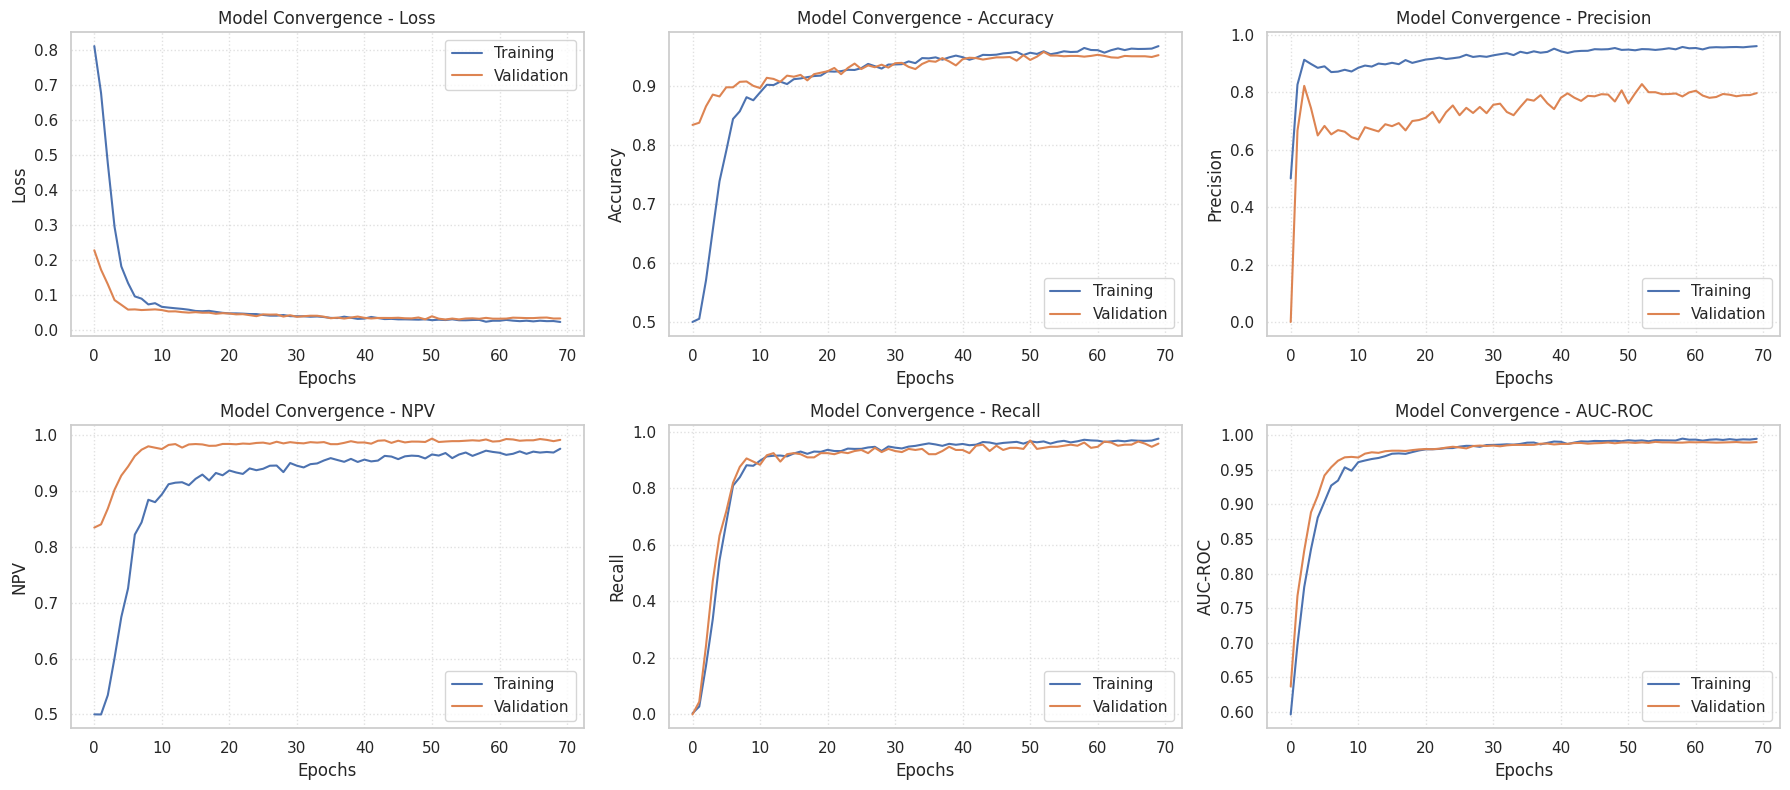

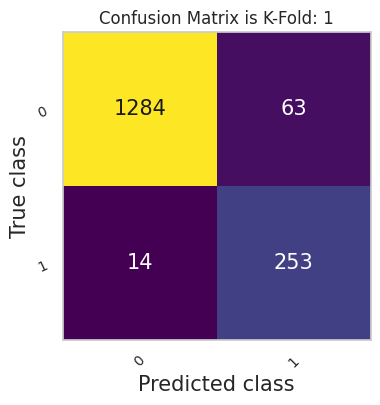


Cross - Validation Progress:  20%|██        | 1/5 [00:43<02:54, 43.61s/it]



Training fold sample set:
################# [ K-Fold 2 ] #################
✅ Model Improvement (Epoch: 0, Score: 0.39741)
✅ Model Improvement (Epoch: 1, Score: 0.70776)
✅ Model Improvement (Epoch: 2, Score: 0.82721)
✅ Model Improvement (Epoch: 3, Score: 0.88051)
✅ Model Improvement (Epoch: 4, Score: 0.92602)
✅ Model Improvement (Epoch: 5, Score: 0.94868)
✅ Model Improvement (Epoch: 6, Score: 0.95485)
✅ Model Improvement (Epoch: 7, Score: 0.96031)
✅ Model Improvement (Epoch: 8, Score: 0.96630)
⏳ EarlyStopping: 1/15 no improvement (Current Score: 0.96354)
✅ Model Improvement (Epoch: 10, Score: 0.97057)
⏳ EarlyStopping: 1/15 no improvement (Current Score: 0.97019)
✅ Model Improvement (Epoch: 12, Score: 0.97359)
✅ Model Improvement (Epoch: 13, Score: 0.97442)
✅ Model Improvement (Epoch: 14, Score: 0.97785)
⏳ EarlyStopping: 1/15 no improvement (Current Score: 0.97674)
✅ Model Improvement (Epoch: 16, Score: 0.97808)
✅ Model Improvement (Epoch: 17, Score: 0.97949)
⏳ EarlyStopping: 1/15 no i

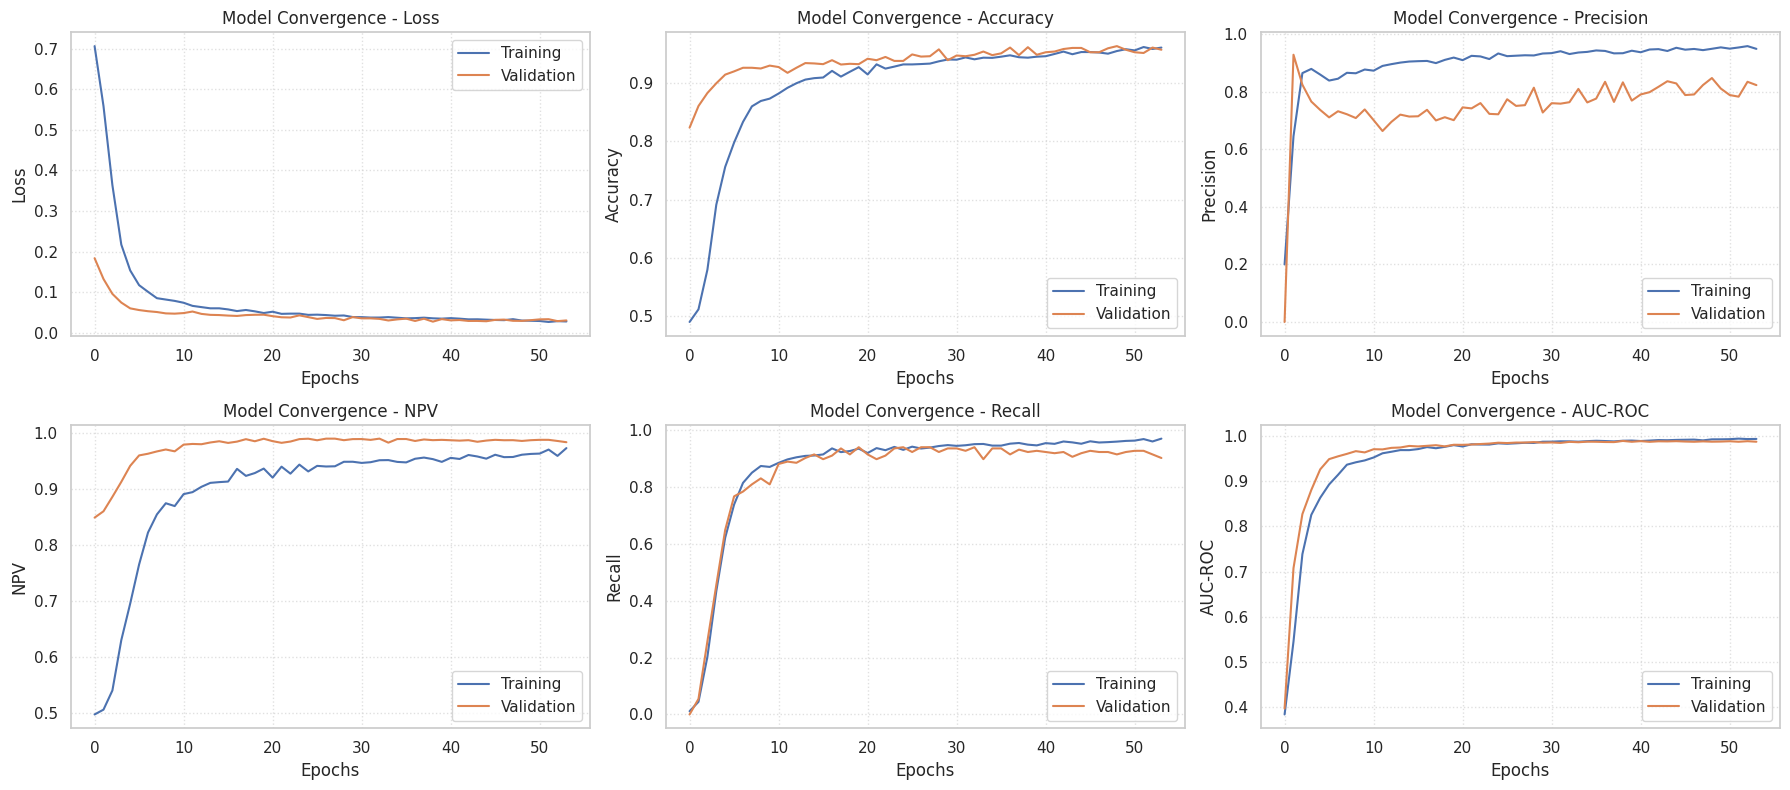

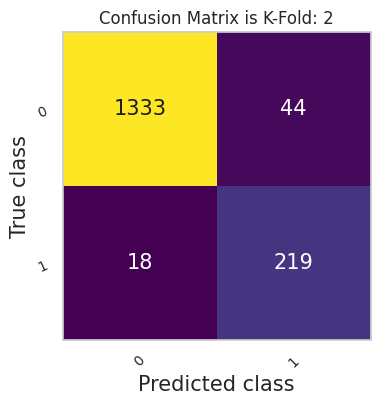


Cross - Validation Progress:  40%|████      | 2/5 [01:13<01:45, 35.26s/it]



Training fold sample set:
################# [ K-Fold 3 ] #################
✅ Model Improvement (Epoch: 0, Score: 0.47322)
✅ Model Improvement (Epoch: 1, Score: 0.77525)
✅ Model Improvement (Epoch: 2, Score: 0.85554)
✅ Model Improvement (Epoch: 3, Score: 0.90174)
✅ Model Improvement (Epoch: 4, Score: 0.93194)
✅ Model Improvement (Epoch: 5, Score: 0.94925)
✅ Model Improvement (Epoch: 6, Score: 0.95908)
✅ Model Improvement (Epoch: 7, Score: 0.96676)
✅ Model Improvement (Epoch: 8, Score: 0.97093)
✅ Model Improvement (Epoch: 9, Score: 0.97310)
✅ Model Improvement (Epoch: 10, Score: 0.97820)
⏳ EarlyStopping: 1/15 no improvement (Current Score: 0.97700)
✅ Model Improvement (Epoch: 12, Score: 0.97965)
✅ Model Improvement (Epoch: 13, Score: 0.98062)
✅ Model Improvement (Epoch: 14, Score: 0.98196)
✅ Model Improvement (Epoch: 15, Score: 0.98338)
⏳ EarlyStopping: 1/15 no improvement (Current Score: 0.98334)
✅ Model Improvement (Epoch: 17, Score: 0.98520)
⏳ EarlyStopping: 1/15 no improvement (Cur

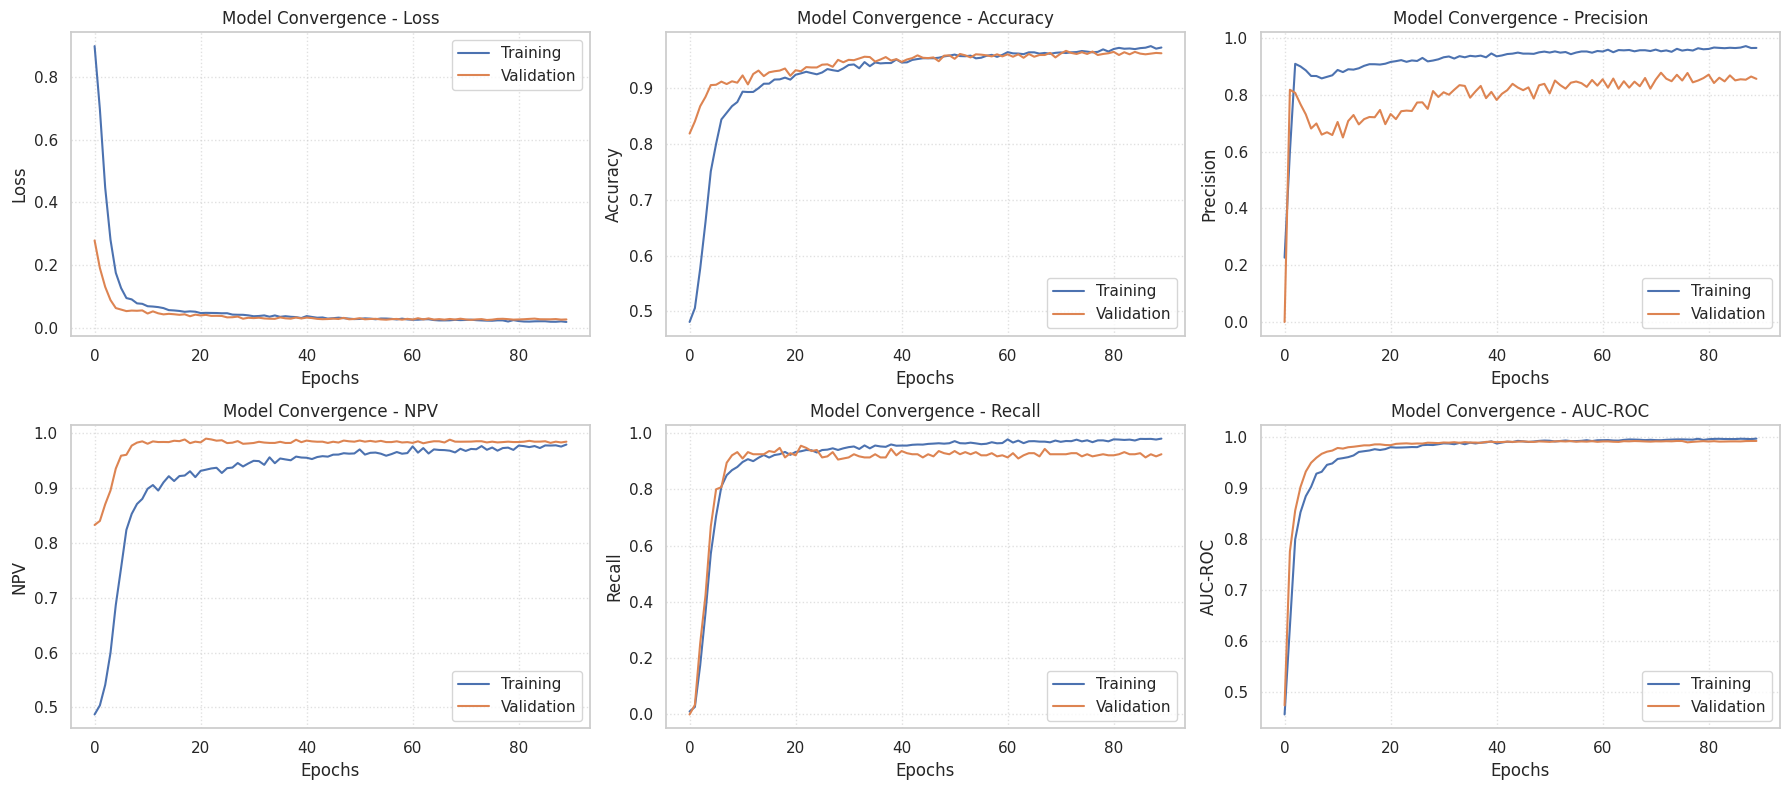

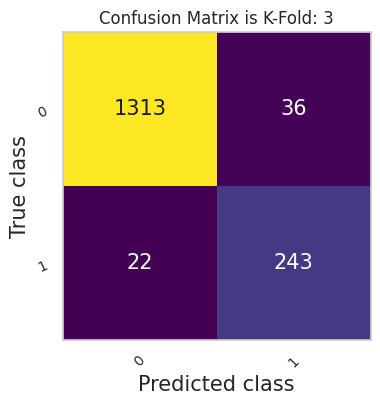


Cross - Validation Progress:  60%|██████    | 3/5 [02:04<01:25, 42.85s/it]



Training fold sample set:
################# [ K-Fold 4 ] #################
✅ Model Improvement (Epoch: 0, Score: 0.54220)
✅ Model Improvement (Epoch: 1, Score: 0.78133)
✅ Model Improvement (Epoch: 2, Score: 0.86589)
✅ Model Improvement (Epoch: 3, Score: 0.90291)
✅ Model Improvement (Epoch: 4, Score: 0.93498)
✅ Model Improvement (Epoch: 5, Score: 0.94718)
✅ Model Improvement (Epoch: 6, Score: 0.95646)
✅ Model Improvement (Epoch: 7, Score: 0.96592)
✅ Model Improvement (Epoch: 8, Score: 0.96734)
✅ Model Improvement (Epoch: 9, Score: 0.97097)
✅ Model Improvement (Epoch: 10, Score: 0.97333)
✅ Model Improvement (Epoch: 11, Score: 0.97451)
⏳ EarlyStopping: 1/15 no improvement (Current Score: 0.97439)
✅ Model Improvement (Epoch: 13, Score: 0.97646)
⏳ EarlyStopping: 1/15 no improvement (Current Score: 0.97413)
⏳ EarlyStopping: 2/15 no improvement (Current Score: 0.97624)
✅ Model Improvement (Epoch: 16, Score: 0.97702)
✅ Model Improvement (Epoch: 17, Score: 0.97834)
⏳ EarlyStopping: 1/15 no im

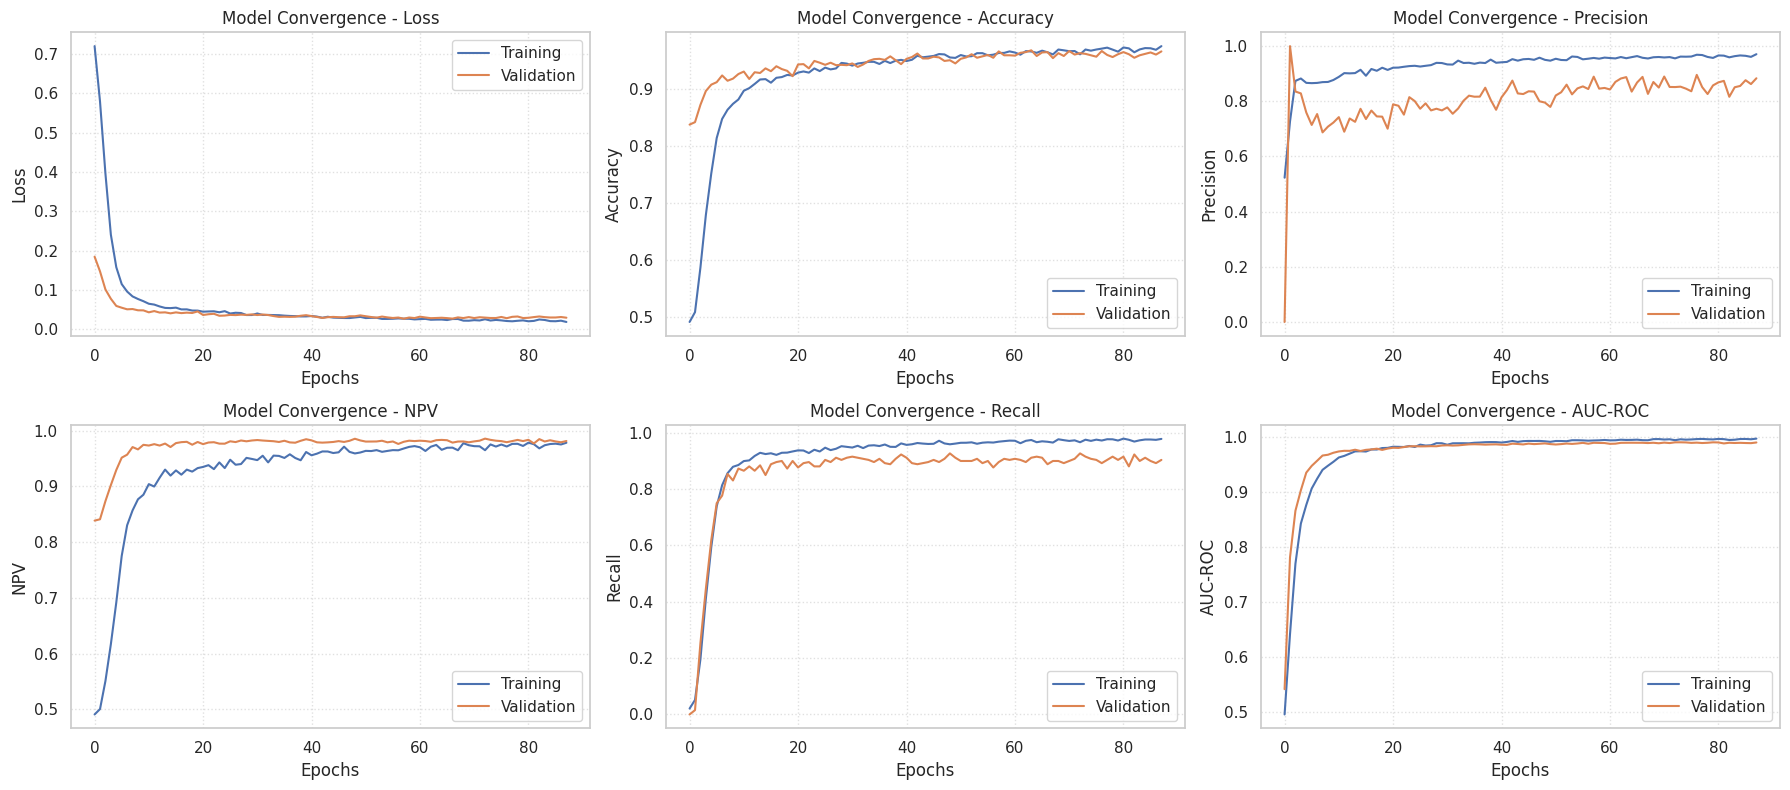

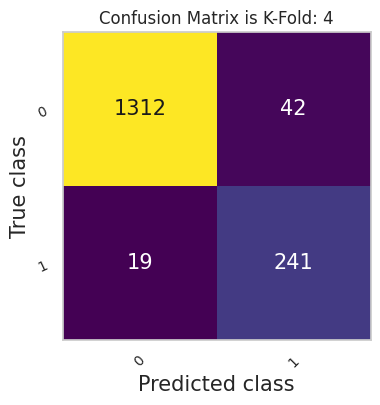


Cross - Validation Progress:  80%|████████  | 4/5 [02:53<00:44, 44.92s/it]



Training fold sample set:
################# [ K-Fold 5 ] #################
✅ Model Improvement (Epoch: 0, Score: 0.58812)
✅ Model Improvement (Epoch: 1, Score: 0.82285)
✅ Model Improvement (Epoch: 2, Score: 0.87154)
✅ Model Improvement (Epoch: 3, Score: 0.90410)
✅ Model Improvement (Epoch: 4, Score: 0.93502)
✅ Model Improvement (Epoch: 5, Score: 0.95385)
✅ Model Improvement (Epoch: 6, Score: 0.96208)
✅ Model Improvement (Epoch: 7, Score: 0.96963)
✅ Model Improvement (Epoch: 8, Score: 0.97552)
✅ Model Improvement (Epoch: 9, Score: 0.97868)
✅ Model Improvement (Epoch: 10, Score: 0.97980)
✅ Model Improvement (Epoch: 11, Score: 0.98049)
✅ Model Improvement (Epoch: 12, Score: 0.98209)
✅ Model Improvement (Epoch: 13, Score: 0.98223)
✅ Model Improvement (Epoch: 14, Score: 0.98318)
✅ Model Improvement (Epoch: 15, Score: 0.98332)
✅ Model Improvement (Epoch: 16, Score: 0.98582)
⏳ EarlyStopping: 1/15 no improvement (Current Score: 0.98538)
✅ Model Improvement (Epoch: 18, Score: 0.98615)
⏳ Early

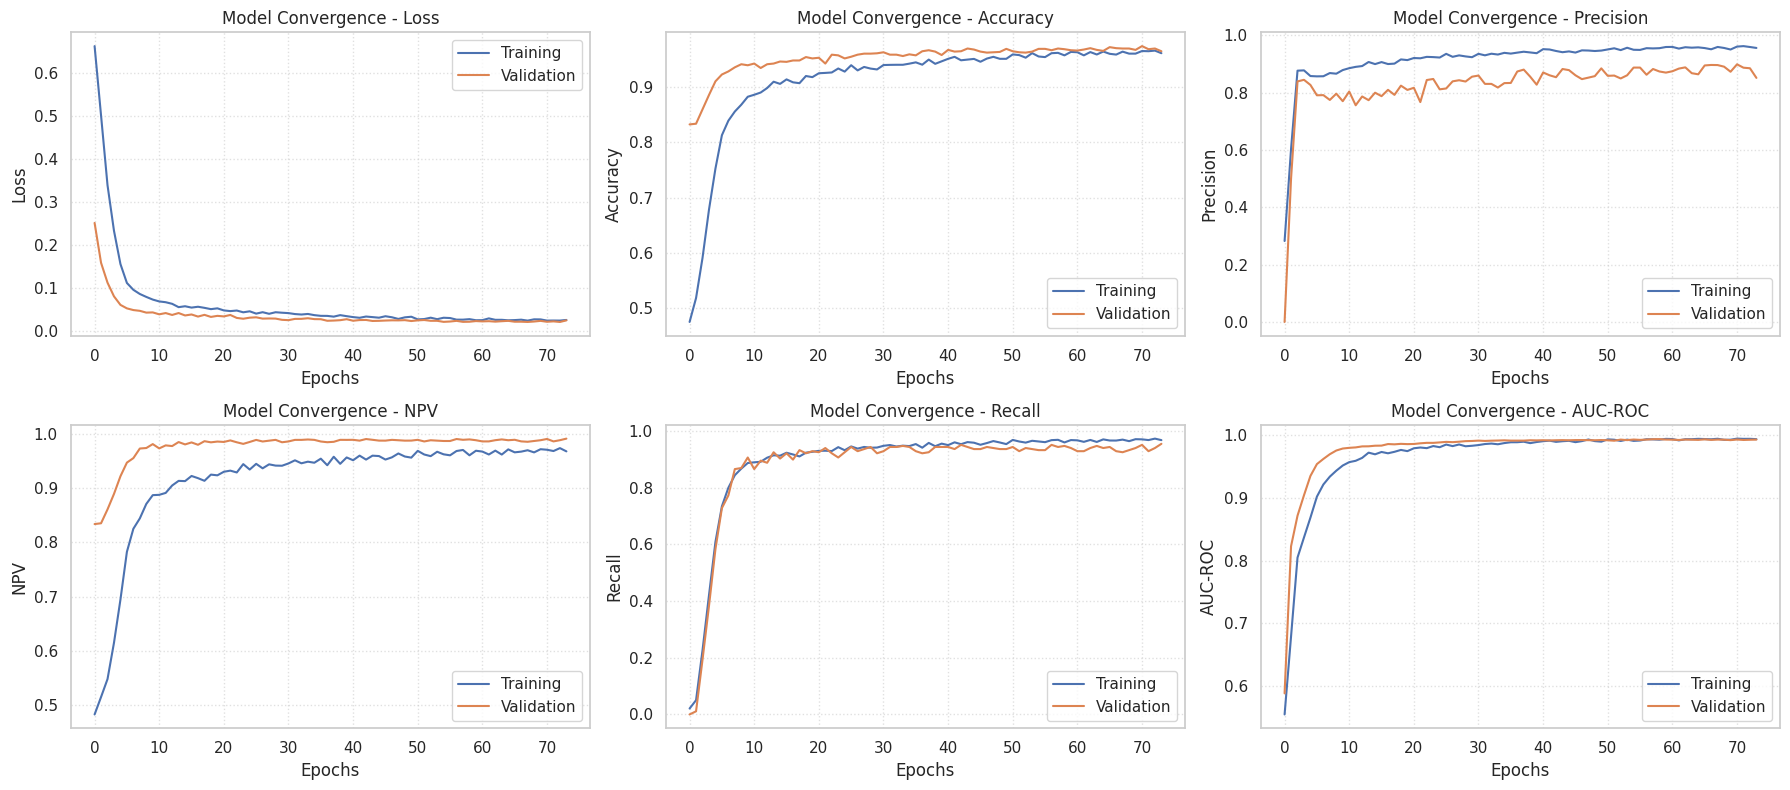

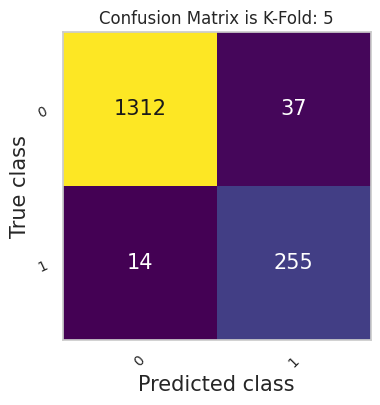



✅### Cross validation Metrics ### :

🔴 Loss: 0.027
☑️ Standard Deviation - Loss: 0.002934

🟠 Accuracy: 96.17%
☑️ Standard Deviation - Accuracy: 0.005298

🔵 Precision: 84.58%
☑️ Standard Deviation - Precision: 0.026960

🔵 NPV: 98.69%
☑️ Standard Deviation - NPV: 0.002221

⚠️ Recall: 93.27%
☑️ Standard Deviation - Recall: 0.012720

🎯 AUC-ROC: 99.10%
☑️ Standard Deviation - AUC-ROC: 0.001672


In [0]:
PyTorch.PyTorchFlow(
    trainset = trainset, 
    l1 = 256,
    l2 = 128,
    l3 = 64,
    dropout_rate = 0.2,
    num_workers = 0,
    batch_size = 128,
    lr = 1e-3,
    weight_decay = 1e-5,
    gamma = 2.0,
    alpha = [1.0, 1.0], 
    max_epochs = 200,
    early_stopping_p = 15,
    early_stopping_mode = 'max',
    save_path_model = '../artifacts/best_model.pt',
    k_fold = 5,
    target_score = 'roc',
    seed = 10
).CrossValidation()

#### Scores of Models

In [0]:
data_scores = {
    'Model': [
        'Logistic Regression', 'Decision Tree', 'Random Forest', 
        'KNeighbors', 'Suport Vector Machine', 'Gradient Boosting', 'Pytorch'
    ], 
    'AUC-ROC Validation': [0.9239, 0.9460, 0.9826, 0.8976, 0.9634, 0.9918, 0.9910], 
    'Standard Deviation': [0.006618, 0.005513, 0.001795, 0.006609, 0.002604, 0.001530, 0.001672], 
}
df_scores = pd.DataFrame(data_scores)
df_scores.sort_values('AUC-ROC Validation')

,Model,AUC-ROC Validation,Standard Deviation
3,KNeighbors,0.8976,0.006609
0,Logistic Regression,0.9239,0.006618
1,Decision Tree,0.9460,0.005513
4,Suport Vector Machine,0.9634,0.002604
2,Random Forest,0.9826,0.001795
6,Pytorch,0.9910,0.001672
5,Gradient Boosting,0.9918,0.001530


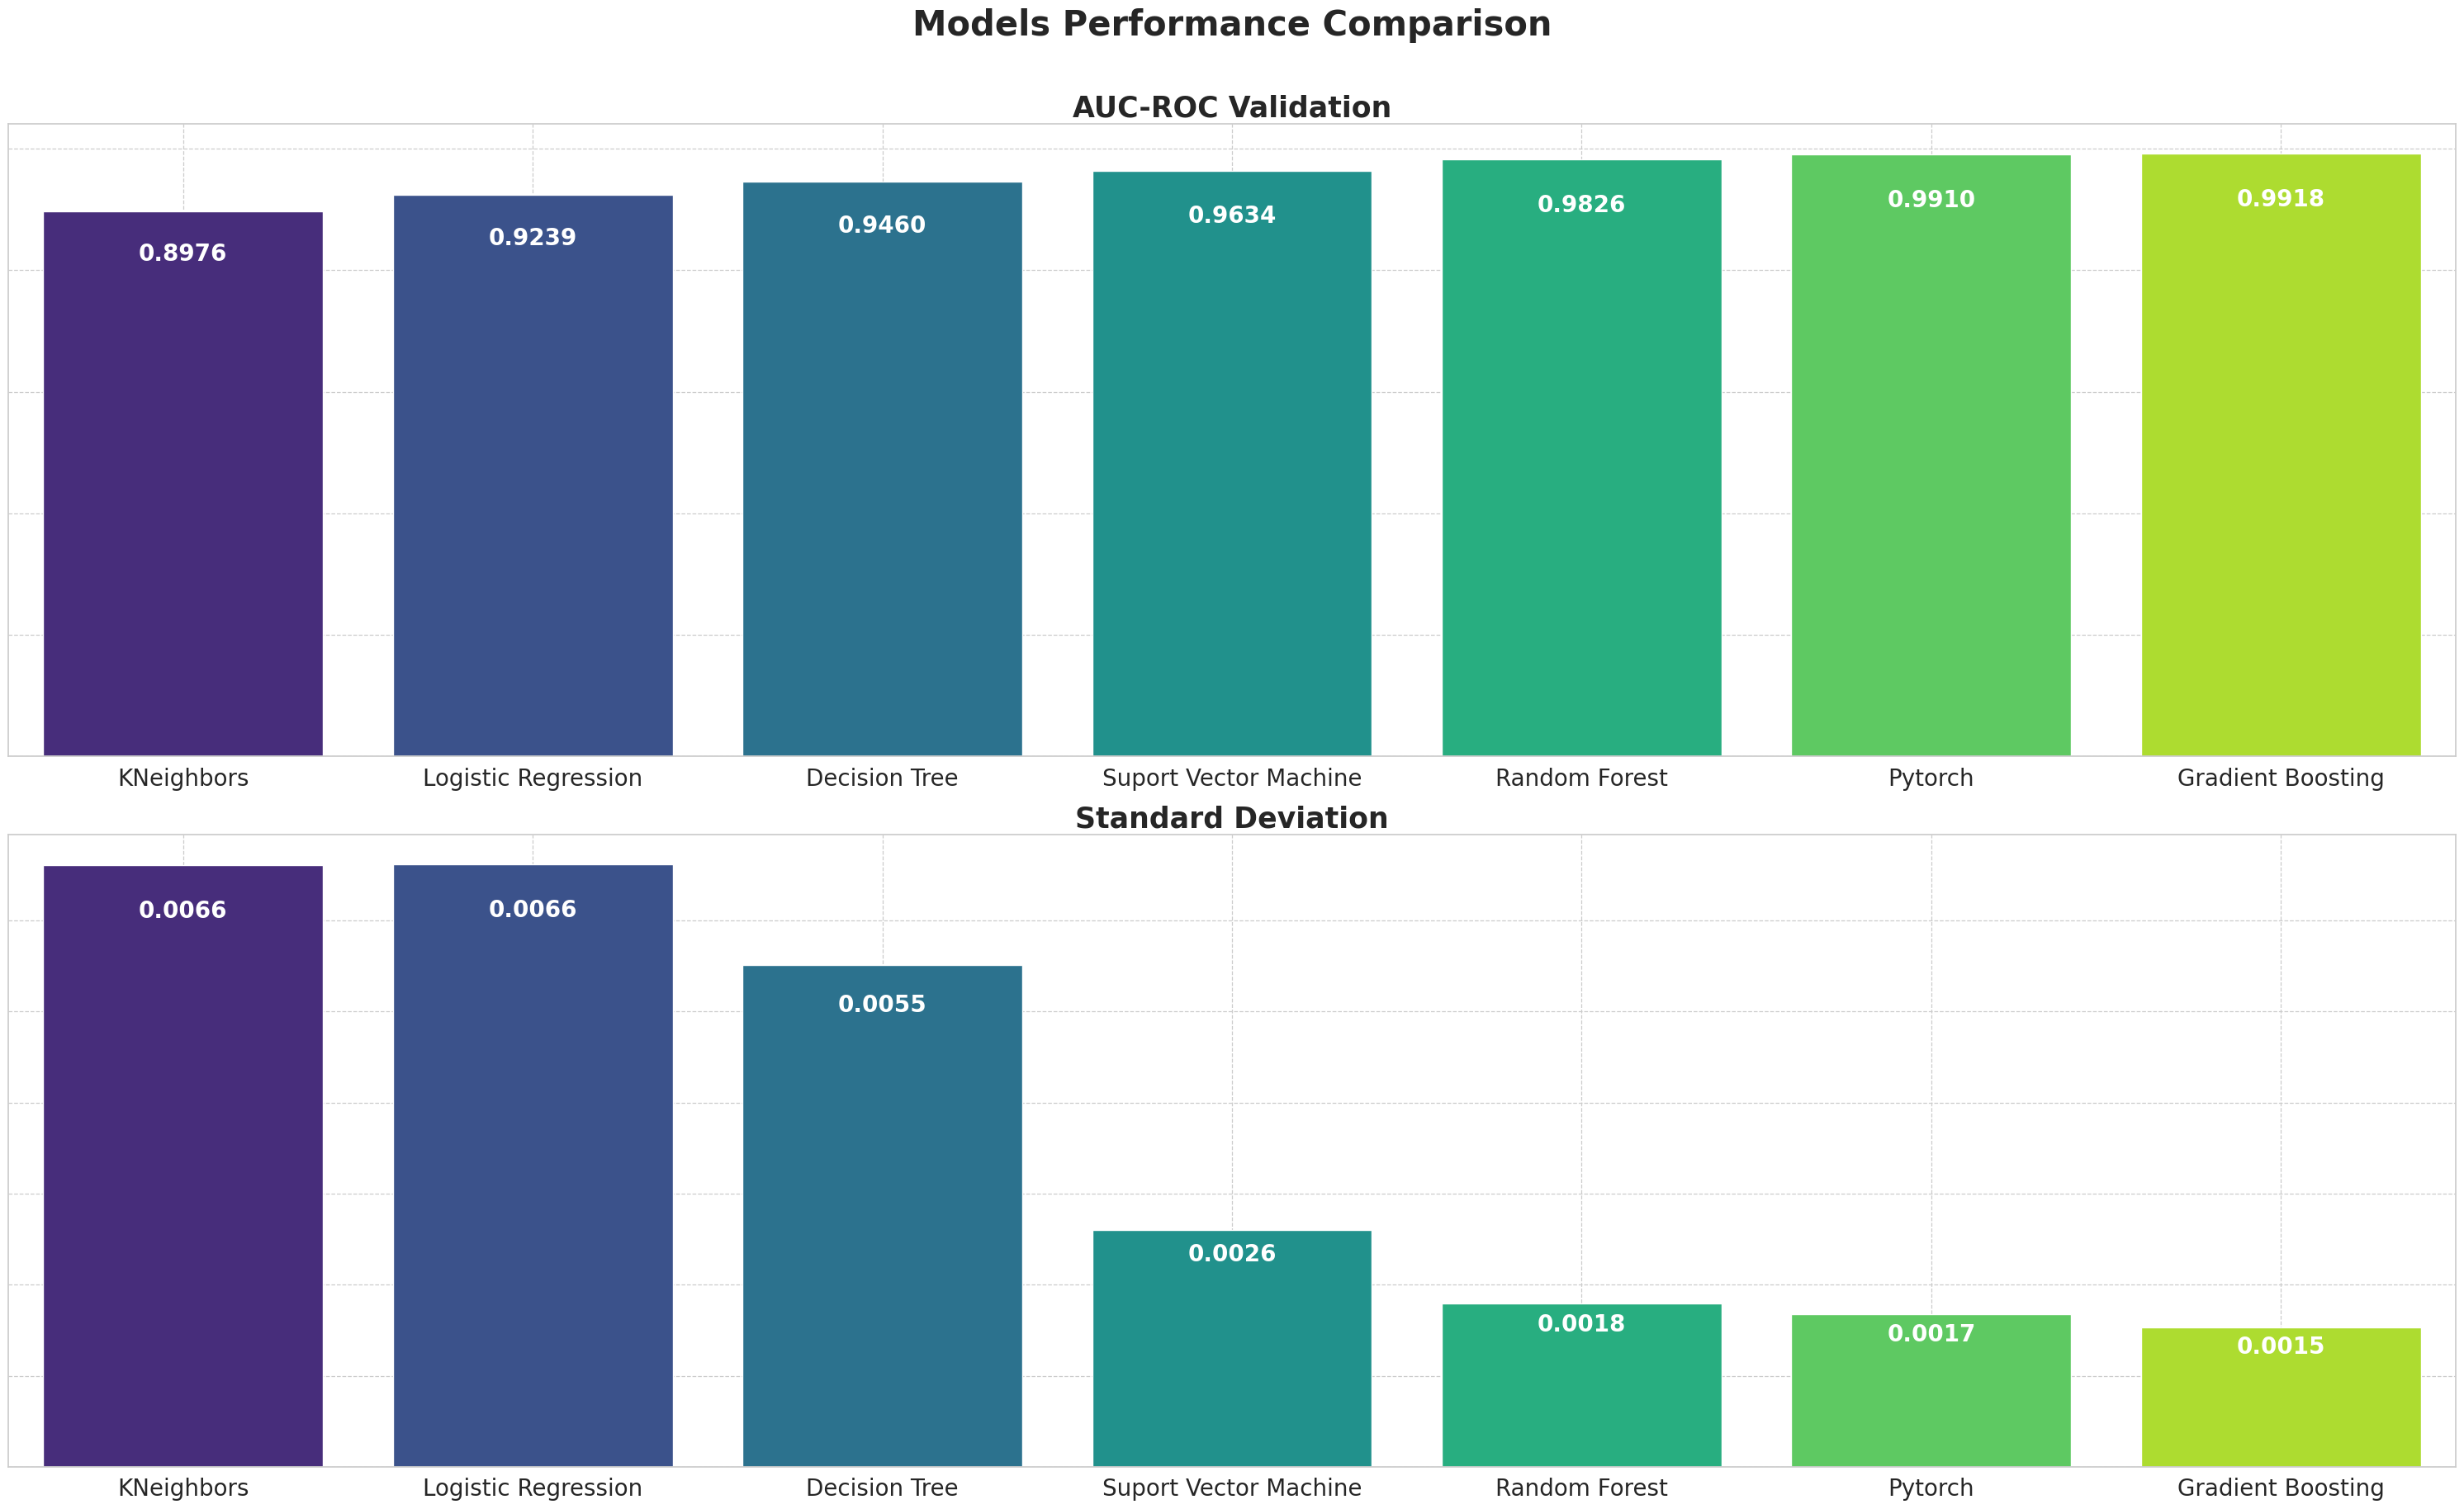

In [0]:
GraphicsData(df_scores.sort_values('AUC-ROC Validation')).models_performance_barplots(models_col = 'Model')


## 5 - Evaluation

At this stage, I analyze the comparative performance of **classical machine learning models** and the **PyTorch neural model**, focusing on both technical and business criteria.  
The comparison considers the top 3 models based on their performance during **cross-validation**.

---

### What is the main goal of a churn prediction project?

- **Customer retention**: prevent customer loss and extend their journey with the institution.
- **Cost reduction**: optimize retention campaigns.
- To achieve this, two indicators are essential: **CAC** and **LTV**.

---

### What are these indicators and how can they financially impact a banking institution?

**Customer Acquisition Cost (CAC)** — varies according to business model, channel, and customer profile.

**Average ranges observed in the market in recent years**:
- **Digital banks / fintechs**: US$ 200 – US$ 700 per customer (optimized digital channels and segmented campaigns).
- **Traditional banks**: above US$ 1,000 per customer (dependence on physical branches and mass media).
- **Aggressive campaigns**: US$ 1,500 – US$ 2,500+, especially for high-income or corporate customers.

**What makes up the CAC**:
- Advertising (TV, radio, print, digital media)
- Performance marketing (Google Ads, social media, affiliates)
- Sales salaries and commissions
- Events and sponsorships
- Financial incentives (cashback, bonuses, fee waivers)
- CRM and marketing automation tools/systems

**Strategy and return**:
- CAC is evaluated alongside **Lifetime Value (LTV)**.
- Customers using multiple products (account, credit card, investments, insurance) justify higher CACs as returns are spread over several years.

**Source of estimated values**:  
[Forbes – What Are Banks’ And Fintechs’ Real Customer Acquisition Costs?](https://www.forbes.com/sites/ronshevlin/2025/03/23/what-are-banks-and-fintechs-real-customer-acquisition-costs/)

---

### Model Performance

| **Model**               | **AUC-ROC** | **Std. Dev. (AUC-ROC)** | **Highlight** |
|-------------------------|-------------|--------------------------|---------------|
| Random Forest           | 98.26%      | ±0.001795                 | Good generalization and consistent AUC-ROC. |
| Gradient Boosting       | 99.18%      | ±0.001530                 | Highest AUC-ROC. |
| Neural Network (PyTorch)| 99.10%      | ±0.001672             | Excellent performance and good generalization. |

---

### Why prioritize the PyTorch model?

1. **Robust generalization**:
   - Lowest standard deviation, indicating superior consistency.
   - Dropout (`p=0.2`) and L2 regularization to mitigate overfitting.

2. **Adaptability to new data**:
   - More efficient architecture for unseen data and atypical patterns.
   - Ability to learn complex non-linear relationships.

3. **Business costs**:
   - **False negatives** cost 5 to 7 times more than false positives.  
     *(estimate: US$ 2,500 per lost customer vs. US$ 500 per unnecessary offer)*  
   - Architectural adjustments and loss functions (e.g., Focal Loss) prioritize **recall**.

---

### Metrics used in evaluating the main model

1. **AUC-ROC**:
   - Measures the discrimination between classes.
   - Main metric: goal is to estimate the probability of churn.

2. **Recall**:
   - Measures the ability to capture all positive cases.
   - Prioritized when the cost of losing a customer is high.

3. **Precision**:
   - Measures the reliability of positive predictions.
   - Monitored to avoid excessive drops, even when recall is prioritized.

4. **NPV**:
   - Measures the reliability of negative predictions.
   - Important for correctly identifying customers who will remain active.

5. **Accuracy**:
   - Overall correctness metric.
   - Used only as a global monitoring measure.

---

### Conclusion

The choice of PyTorch is justified by:

- **Scalability**: integrates new variables without full retraining.
- **Robustness**: small AUC-ROC difference is offset by stability and consistency in dynamic scenarios.



### Hyperparameter Tuning

- The network architecture and its parameters/hyperparameters are already well-defined, and the current metrics are satisfactory for the project’s objectives.  
Therefore, the **hyperparameter tuning** process will be used to validate the parameters already tested and implemented, as well as to seek an **improvement in the AUC-ROC score**, focusing on **reducing variance** and **bias** across the models in the 5-fold cross-validation.

- Given the complexity of neural networks, it is challenging to precisely determine the ideal number of neurons per layer.  
Architectures with a progressive decrease in neurons — such as **256 → 128 → 64** — are often effective in many scenarios.  
However, it is still important to explore new possibilities and test different configurations in this regard.

- A more precise adjustment of the **learning rate** will also be performed, along with verification of the **L2 regularization (weight decay)**.  
The goal is to assess whether a lower value (`1e-5`) remains more effective than a higher value (`5e-4`) in the current context.

- Finally, the impact of **batch size** will be tested, with values of **128, 256, and 512**.  
The choice of larger batch sizes is justified by the use of **Batch Normalization** in the network layers.  
Using very small batches can negatively affect performance, since BatchNorm calculates the mean and variance of the input data in each mini-batch for normalization.  
With very small batches, these statistics may become unstable, which can harm the network’s performance.


In [0]:
best_params = PyTorch.PyTorchFlow(
    trainset = trainset, 
    dropout_rate = 0.2,
    num_workers = 0,
    gamma = 2.0,
    alpha = [1.0, 1.0], 
    max_epochs = 200,
    early_stopping_p = 15,
    early_stopping_mode = 'max',
    k_fold = 5,
    target_score = 'roc',
    seed = 10
).HyperTunning(n_samples = 30)

[I 2025-08-22 19:10:02,932] A new study created in memory with name: no-name-60a84f55-a9a2-4e0f-8fe6-edba1f0ee946
[I 2025-08-22 19:11:52,816] Trial 0 finished with value: 0.9889145970344544 and parameters: {'l1': 416, 'l2': 16, 'l3': 168, 'batch_size': 128, 'lr': 0.0015778396477600328, 'weight_decay': 1e-05}. Best is trial 0 with value: 0.9889145970344544.
[I 2025-08-22 19:13:18,362] Trial 1 finished with value: 0.9905168652534485 and parameters: {'l1': 64, 'l2': 352, 'l3': 248, 'batch_size': 512, 'lr': 0.004097567031205672, 'weight_decay': 1e-05}. Best is trial 1 with value: 0.9905168652534485.
[I 2025-08-22 19:14:55,058] Trial 2 finished with value: 0.9907015085220336 and parameters: {'l1': 480, 'l2': 368, 'l3': 144, 'batch_size': 512, 'lr': 0.0027658789839904367, 'weight_decay': 0.0005}. Best is trial 2 with value: 0.9907015085220336.
[I 2025-08-22 19:16:26,537] Trial 3 finished with value: 0.990980327129364 and parameters: {'l1': 288, 'l2': 336, 'l3': 160, 'batch_size': 512, 'lr': 


✅ Best trial:
Score: 0.9913165926933288
Params:{'l1': 160, 'l2': 224, 'l3': 192, 'batch_size': 128, 'lr': 0.002553950721520491, 'weight_decay': 0.0005}


In [0]:
print(best_params)

{'l1': 160, 'l2': 224, 'l3': 192, 'batch_size': 128, 'lr': 0.002553950721520491, 'weight_decay': 0.0005}



### Conclusions on Hyperparameter Tuning

- During the hypertuning process, there was a subtle performance improvement in AUC-ROC, rising from **0.9910 to 0.9913**.

- It is possible to conclude that the parameters and hyperparameters initially defined during model setup are **well-aligned and consistent**.  
  Across the 30 tests performed, the network demonstrated **strong performance under different configurations**, which suggests that the model has achieved **good generalization** and likely learned **without signs of overfitting**.

### The Best Parameters:

  - **l1:** 160 

  - **l2:** 224 

  - **l3:** 192

  - **batch_size:** 128 

  - **lr:** 0.002553950721520491

  - **weight_decay:** 0.0005


### Final Training

- In this step, the parameters and hyperparameters obtained during the hypertuning process will be applied to a training and validation workflow, using **80%** of the data for training and **20%** reserved for validation.

- After training, the model will be saved and applied to the **test data** to verify its **actual performance** and confirm that its bias and variance are consistent and within expectations in relation to the training data.

✅ Model Improvement (Epoch: 0, Score: 0.60546)
✅ Model Improvement (Epoch: 1, Score: 0.88429)
✅ Model Improvement (Epoch: 2, Score: 0.93420)
✅ Model Improvement (Epoch: 3, Score: 0.95781)
✅ Model Improvement (Epoch: 4, Score: 0.96813)
✅ Model Improvement (Epoch: 5, Score: 0.97259)
✅ Model Improvement (Epoch: 6, Score: 0.97644)
✅ Model Improvement (Epoch: 7, Score: 0.97807)
✅ Model Improvement (Epoch: 8, Score: 0.98011)
⏳ EarlyStopping: 1/15 no improvement (Current Score: 0.97873)
✅ Model Improvement (Epoch: 10, Score: 0.98432)
✅ Model Improvement (Epoch: 11, Score: 0.98462)
✅ Model Improvement (Epoch: 12, Score: 0.98576)
✅ Model Improvement (Epoch: 13, Score: 0.98805)
✅ Model Improvement (Epoch: 14, Score: 0.98931)
⏳ EarlyStopping: 1/15 no improvement (Current Score: 0.98845)
⏳ EarlyStopping: 2/15 no improvement (Current Score: 0.98899)
✅ Model Improvement (Epoch: 17, Score: 0.99039)
⏳ EarlyStopping: 1/15 no improvement (Current Score: 0.99001)
✅ Model Improvement (Epoch: 19, Score: 0.

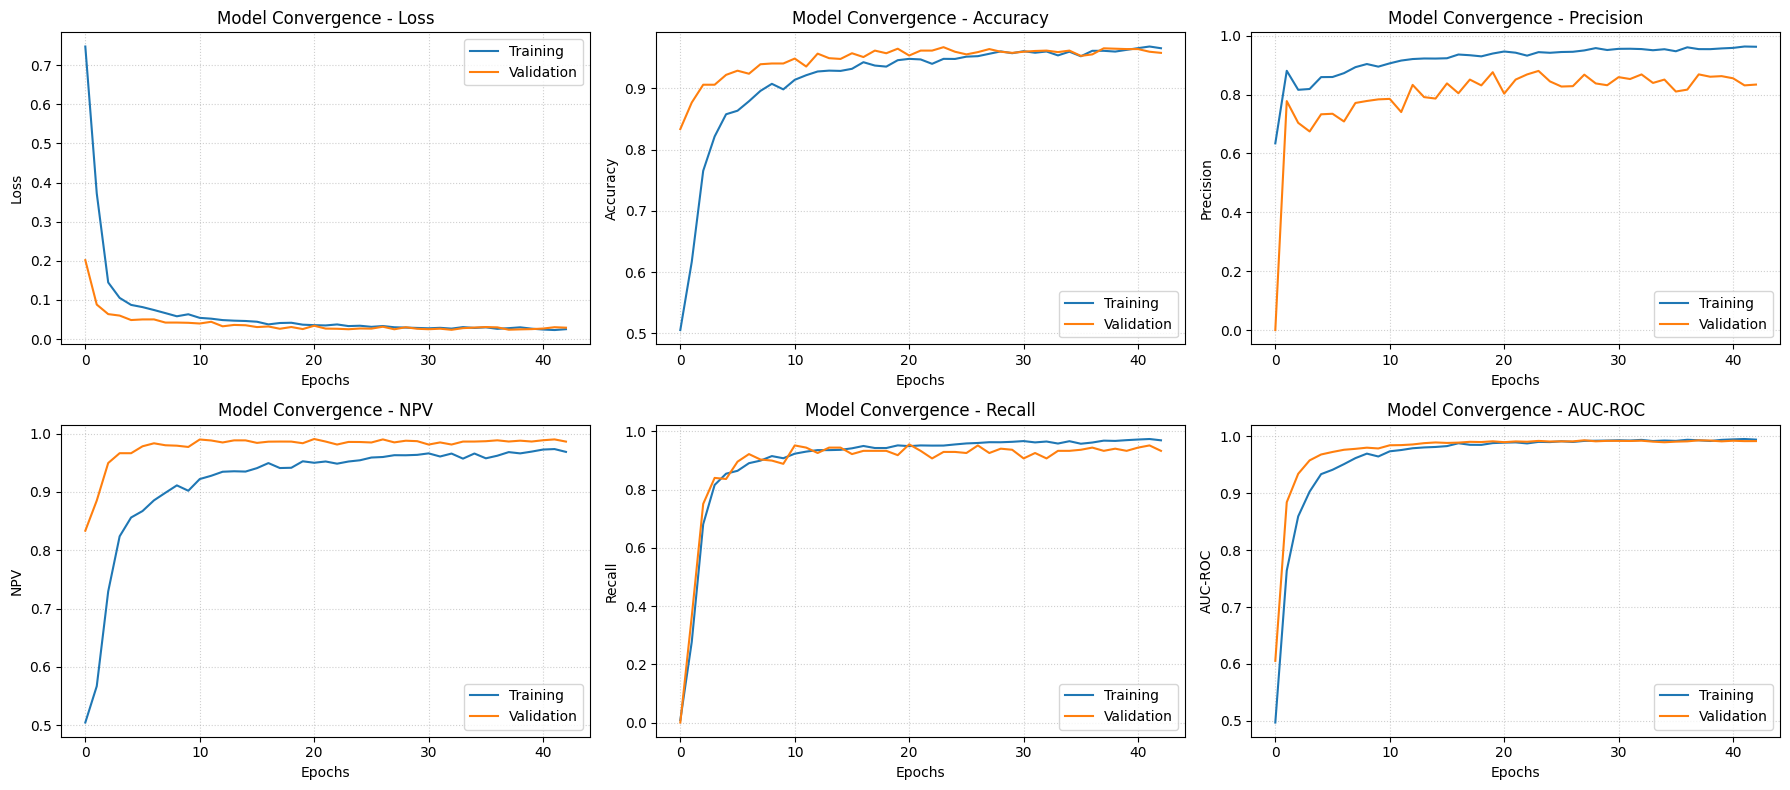

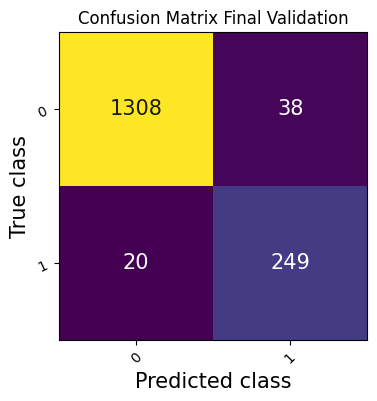

In [0]:
PyTorch.PyTorchFlow(
    trainset = trainset, 
    l1 = 160,
    l2 = 224,
    l3 = 192,
    dropout_rate = 0.2,
    num_workers = 0,
    batch_size = 128,
    lr = 0.002553950721520491,
    weight_decay = 5e-4,
    gamma = 2.0,
    alpha = [1.0, 1.0], 
    max_epochs = 200,
    early_stopping_p = 15,
    early_stopping_mode = 'max',
    save_path_model = '../artifacts/final_model.pt',
    target_score = 'roc',
    seed = 10
).FinalTraining()

### Final Testing

In [0]:
# Loading Net
net = PyTorch.Net(l1 = 160, l2 = 224, l3 = 192, prior_minoritary_class = 0.15931258708778448)
net.load_state_dict(torch.load('../artifacts/final_model.pt'))

<All keys matched successfully>

In [0]:
# Salving the model
torch.save(net.state_dict(), '../artifacts/final_model.pth')
print('Saved Pytorch Model State to ../artifacts/final_model.pth')

Saved Pytorch Model State to ../artifacts/final_model.pt


In [0]:
# Salving the pipeline of preprocessing
with open('../artifacts/nn_proprocessor.pkl', 'wb') as fp:
    pickle.dump(nn_proprocessor, fp)

In [0]:
# Preprocessing Test data -  Only transfom not fit_transform
preprocessed_test = nn_proprocessor.transform(test)

In [0]:
# Datset Pytoch
testset = PyTorch.Dataset(
    dataset = preprocessed_test,
    cat_idx = [0, 5],
    num_idx = [5, 18],
    label_idx = [18, 19],
)

In [0]:
categorical, numerical, label = testset[0]
print(f'The Categorical tensor {categorical}')
print(f'\nThe Numerical tensor {numerical}')
print(f'\nThe Labels {label}')

The Categorical tensor tensor([0, 1, 3, 2, 0])

The Numerical tensor tensor([ 0.0000,  0.0000,  0.0000,  0.2000,  0.5000,  0.5000,  0.4251,  0.5325,
         0.2667,  0.1710,  0.5859, -0.2957, -0.1023])

The Labels tensor([0.])



✅ Test Metrics:
Loss: 0.027
Accuracy:  96.6%
Precision:  85.7%
NPV:  99.0%
Recall:  94.8%
AUC-ROC:  99.2%


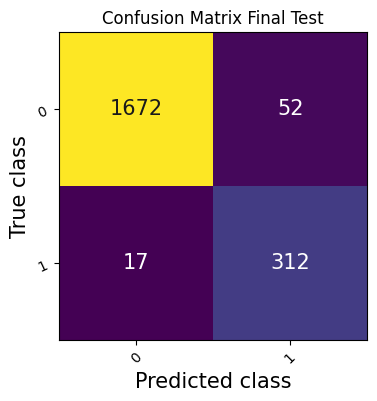

In [0]:
# Test Net
preds, labels = PyTorch.PyTorchFlow(testset = testset).FinalTest(net = net)


### Analyzing model performance on test data

In [0]:
# Data collect
list_preds = preds.flatten().tolist()
list_labels = labels.flatten().tolist()
data_preds = {
    'Predictions': list_preds,
    'Labels': list_labels,
}
df_preds = pd.DataFrame(data_preds)
df_preds.sample(10)

,Predictions,Labels
1100,0.024387,0
927,0.046787,0
1758,0.299436,0
869,0.447896,1
640,0.316504,0
1769,0.017193,0
1217,0.072384,0
1127,0.938158,1
29,0.075170,0
1711,0.822186,1


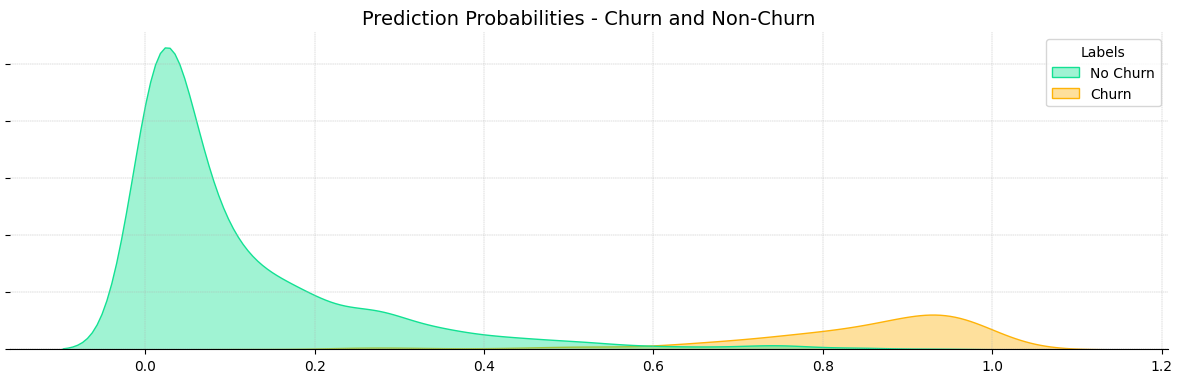

In [0]:
# Organizing data and renaming labels
data_ax = df_preds
data_ax['Labels'] = data_ax['Labels'].map({0: 'No Churn', 1: 'Churn'})

# Graphic Plot KDE
GraphicsData(data_ax).plot_kde_predictions(
    predictions = 'Predictions',
    labels = 'Labels',
    title = 'Prediction Probabilities - Churn and Non-Churn'
)


- There is a clear separation between the predicted probabilities for churners and non-churners, which is an excellent indicator of the model’s performance.  

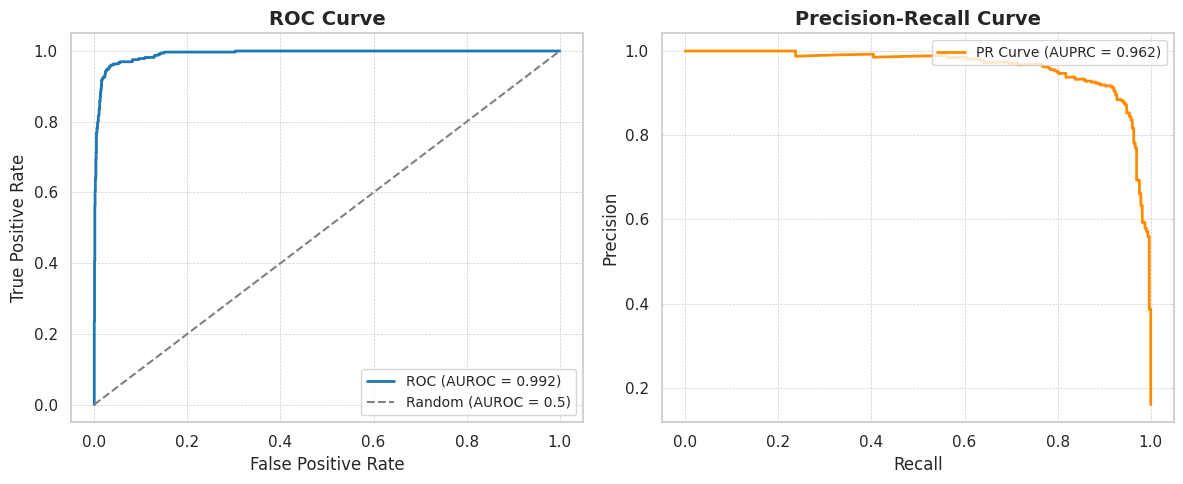

In [0]:
GraphicsData.plot_roc_pr_curves(preds = preds, labels = labels)


### Results Analysis

#### 1. **AUC-ROC = 0.992**
- **What it measures:** The ROC curve (Receiver Operating Characteristic) evaluates the model’s ability to distinguish between classes (churn vs. non-churn) across all possible thresholds.  
- **Interpretation:** A value of 0.992 is **extremely high** — meaning that in 99.2% of cases, the model assigns a higher probability to a customer who actually churned than to one who did not.  
- **Conclusion:** The model demonstrates **excellent discriminative power**, with an almost perfect separation between the classes.

---

#### 2. **Precision-Recall = 0.962**
- **What it measures:** This curve is especially useful in **class imbalance** scenarios (e.g., when churners represent a small portion of the total customer base).  
  - **Precision:** Of the customers predicted as churners, how many actually churned.  
  - **Recall:** Of all customers who churned, how many were correctly identified by the model.  
- **Interpretation:** A value of 0.962 indicates that the model maintains **high precision and high recall** simultaneously, even at more challenging thresholds.  
- **Conclusion:** The model not only separates the classes well but also **identifies most churners with a low false positive rate**.

---

####  Overall Conclusion
- **Strength:** The model is **highly reliable** in both discriminating between and identifying churners, even in imbalanced class scenarios.  
- **Note:** While such high metrics could, in some cases, indicate **overfitting**, in this case **cross-validation** was used for parameter and hyperparameter tuning and validation, which reinforces the robustness of the results.


### Financial Results

#### Final Metrics – Test Model

After applying the trained model to the test dataset, the following performance metrics were obtained. These results confirm the model’s ability to generalize well and maintain consistency on unseen data:

| **Metric**    | **Score** |
|---------------|-----------|
| **Loss**      | 0.027     |
| **Accuracy**  | 96.6%     |
| **Precision** | 85.7%     |
| **NPV**       | 99.0%     |
| **Recall**    | 94.8%     |
| **AUC-ROC**   | 99.2%     |

- The **low loss value** indicates strong convergence and minimal prediction error.  
- The **high recall** confirms the model’s effectiveness in identifying churn cases, aligning with the strategic goal of minimizing customer loss. The model captures **94.8%** of churners, enabling retention actions before potential service discontinuation.  
- The **NPV and precision** values demonstrate balanced performance across both classes.  
- The **AUC-ROC of 99.2%** reinforces the model’s high discriminative power and reliability in probabilistic churn prediction.

These metrics validate the robustness of the trained model and its suitability for deployment in retention strategies. The high AUC-ROC allows for more assertive campaigns targeting customers classified as churners. Considering the previously mentioned **Customer Acquisition Cost (CAC)** and **Lifetime Value (LTV)**, we can build a hypothetical scenario (as no official figures are available for this institution) to estimate the costs involved in retention and the potential loss of customers.

---

**Hypothetical Cost Scenario:**

- **Cost to acquire a customer:** US$ 2,500  
- **Cost to retain a customer classified as a churner:** US$ 500  

Based on the confusion matrix:  
- **329 churners**  
- **1,672 non-churners**  
- The model classified **364 customers as churners**

#### 1. Cost of false positives (non-churners classified as churners):

- With a precision of **85.7%**, there were **52 false positives**.  
- Cost: 52 × US$ 500 = **US$ 26,000**  
- Total retention campaign cost: 364 × US$ 500 = **US$ 182,000**  
- Proportion of resources incorrectly allocated:  
  US$ 26,000 / US$ 182,000 = **14.28%**

This is considered satisfactory, as only a small portion of resources would be spent on customers who would not have left the service. Nevertheless, such actions may still positively impact customer loyalty.

#### 2. Preservation of customer acquisition investment (CAC):

- Total investment to acquire the 329 churners: 329 × US$ 2,500 = **US$ 822,500**  
- With a recall of **94.8%**, the model correctly identifies **312 churners**  
- Preserved value: 312 × US$ 2,500 = **US$ 780,000**

Therefore, the model has the potential to preserve up to **US$ 780,000** in acquisition investment, provided that retention actions are effective.  
The high AUC-ROC reinforces confidence in making more aggressive decisions with low risk of wasting resources on customers not at risk of churn.

---

#### 3. Lifetime Value (LTV) Assessment

**Lifetime Value (LTV)** is a strategic metric that estimates the total value a customer generates for the institution over the course of their relationship.  
It helps assess whether investments in **acquisition (CAC)** and **retention** are financially justified.

The simplified formula for calculating LTV is:

**LTV = Average Ticket × Purchase Frequency × Average Relationship Duration**

For illustrative purposes, let’s consider the following estimated values based on credit card customers:

- **Average monthly ticket:** US$ 150 *(estimated value, as no official data is available)*  
- **Purchase frequency:** monthly  
- **Average relationship duration:** 3 years (36 months), based on the bank’s customer history  

**Estimated LTV = 150 × 12 × 3 = US$ 5,400**

This value represents the average return the bank can expect from each customer over three years.  
Comparing it to the **average CAC of US$ 2,500**, we have an **LTV/CAC ratio of 2.16**, indicating a healthy and sustainable relationship — meaning the value generated per customer is more than double the acquisition cost.

This analysis reinforces the importance of effective retention strategies:  
- By preserving churners, the model not only avoids losing the acquisition investment but also **protects the customer’s future LTV**.

#### Potential Revenue Preserved:

- **Potential gross revenue** over a 3-year period for customers identified as churners and successfully retained:  
  312 × US$ 5,400 = **US$ 1,684,800**

- Additionally, with a recall of **94.8%**, the model has the potential to preserve up to **US$ 780,000** in acquisition investment (CAC) and **US$ 1.68 million** in future gross revenue (LTV), provided that retention actions are effective.

---

**Conclusion:**  
A predictive model with high AUC-ROC and recall not only reduces immediate losses but also **maximizes the long-term value** of customers, directly contributing to the institution’s profitability and sustainability.


## 6 - Deployment  

In this step, I deploy the final churn prediction classifier, developed using the insights and statistical patterns identified during the Exploratory Data Analysis (EDA).  
The model processes individual customer data and returns:  

- **Churn probability** — the likelihood of the customer leaving.  
- **Key influencing factors** — the main behavioral and financial indicators driving the prediction.  
- **Actionable recommendations** — targeted suggestions to help reduce churn risk.  

This deployment enables data-driven decision-making, allowing the business to proactively implement retention strategies, improve customer engagement, and maximize lifetime value.


In [0]:
train.head()

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,churn_target
0,26,F,0,Graduate,Single,$40K - $60K,Blue,13,5,1,2,5655.0,0,0.842,2312,61,0.649,0.000,0
1,26,F,0,Graduate,Single,$40K - $60K,Blue,13,6,3,4,1643.0,1101,0.713,2152,50,0.471,0.670,0
2,26,F,0,Graduate,Single,$40K - $60K,Blue,17,5,3,3,3119.0,1328,0.722,2740,62,0.512,0.426,0
3,26,F,0,Graduate,Single,$40K - $60K,Blue,36,5,3,3,3930.0,0,0.758,2067,42,0.355,0.000,0
4,26,F,0,Graduate,Single,Less than $40K,Blue,19,2,1,2,3416.0,1109,0.783,4614,70,1.000,0.325,0


#### Avg Utilization Mean

In [0]:
train.groupby('churn_target')['avg_utilization_ratio'].mean()

churn_target
0    0.293513
1    0.158092
Name: avg_utilization_ratio, dtype: float64

#### Total Revolving Bal Mean

In [0]:
train.groupby('churn_target')['total_revolving_bal'].mean().round()

churn_target
0    1255.0
1     652.0
Name: total_revolving_bal, dtype: float64

#### Total Relationship Mean

In [0]:
train.groupby('churn_target')['total_relationship_count'].mean().round()

churn_target
0    4.0
1    3.0
Name: total_relationship_count, dtype: float64

#### Contacts Count 12 Months Mean

In [0]:
train.groupby('churn_target')['contacts_count_12_mon'].mean().round()

churn_target
0    2.0
1    3.0
Name: contacts_count_12_mon, dtype: float64

#### Total Transfer Amount Mean

In [0]:
train.groupby('churn_target')['total_trans_amt'].mean().round()

churn_target
0    4642.0
1    3094.0
Name: total_trans_amt, dtype: float64

#### Total Transaction Count Mean

In [0]:
train.groupby('churn_target')['total_trans_ct'].mean().round()

churn_target
0    69.0
1    45.0
Name: total_trans_ct, dtype: float64

## -- Final Classifier --

In [0]:
test.sample(10)

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,churn_target
1797,56,F,2,High School,Married,Unknown,Blue,51,4,1,3,1796.0,1243,0.768,4316,87,0.891,0.692,0
1467,51,M,1,High School,Married,Less than $40K,Blue,41,3,4,3,1438.3,0,0.623,4312,81,0.723,0.000,0
921,46,F,2,Graduate,Single,Less than $40K,Blue,30,3,1,0,5494.0,2142,1.014,8328,78,0.733,0.390,0
1365,50,M,1,Unknown,Single,$120K +,Blue,44,5,3,1,17827.0,0,0.846,5010,88,0.725,0.000,0
514,41,F,4,College,Unknown,Unknown,Blue,22,4,2,3,1438.3,1125,0.611,2534,52,0.486,0.782,1
996,46,M,3,High School,Married,$60K - $80K,Blue,36,4,3,1,4696.0,0,0.732,4828,62,1.583,0.000,0
984,46,M,2,Unknown,Divorced,$60K - $80K,Blue,37,6,1,1,2695.0,1657,0.813,4068,53,0.963,0.615,0
58,32,F,0,College,Married,Unknown,Blue,36,5,3,3,6715.0,1314,0.987,1731,41,0.519,0.196,0
1743,55,F,2,Graduate,Single,Less than $40K,Blue,43,1,3,1,1745.0,1168,0.701,4562,67,0.634,0.669,0
1543,52,F,5,Unknown,Single,Unknown,Blue,36,3,1,3,3167.0,1387,0.899,4587,76,0.551,0.438,0


In [0]:
def final_classifier(
    customer_to_classify, 
    device = 'cpu'
):

        
    """
    Classify a single customer as potential churner or no-churner using a pre-trained PyTorch neural network.

    This function loads a pre-trained neural network and a preprocessing pipeline to
    transform the customer's data, performs a forward pass, and interprets the
    results with a decision threshold. It also prints key indicators and actionable
    insights for the customer to help reduce churn risk.

    Args:
        customer_to_classify (pd.DataFrame): A DataFrame with a single row representing
            the customer to classify. Must contain the same features used during model training.
        device (str, optional): The device to run the model on, e.g., 'cpu' or 'cuda'.
            Default is 'cpu'.

    Returns:
        None: The function prints classification results, probability of churn, and
            interpretable customer indicators. It does not return a value.

    Workflow:
        1. Makes a secure copy of the input data to avoid altering the original DataFrame.
        2. Ensures a dummy 'churn_target' column exists for pipeline compatibility.
        3. Loads the saved preprocessing pipeline and applies it to the customer data.
        4. Splits the processed data into categorical and numerical tensors.
        5. Loads the pre-trained PyTorch network and moves it to the specified device.
        6. Computes the predicted churn probability using a sigmoid activation.
        7. Applies a decision threshold (0.5) to determine the binary class.
        8. Prints the classification, probability, and interpretable indicators with recommendations.

    Example:
        import pandas as pd

        # Prepare a single customer
        customer = pd.DataFrame({
            'avg_utilization_ratio': [0.12],
            'total_revolving_bal': [500.0],
            'total_relationship_count': [2],
            'total_trans_amt': [2500.0],
            'total_trans_ct': [30],
            # ... include all other required features
        })

        final_classifier(customer, device='cpu')

    Raises:
        Exception: If the preprocessing pipeline or model files cannot be loaded,
            or if input data is missing required features.
    """
    # Secure copy of data (avoids altering the original)
    customer_data = customer_to_classify.copy()

    # Add target column just for pipeline compatibility (will not be used)
    if 'churn_target' not in customer_data.columns:
        customer_data['churn_target'] = None  # dummy

    # Loading preprocessing pipeline
    with open('../artifacts/nn_proprocessor.pkl', 'rb') as fp:
        preprocessor_loaded = pickle.load(fp)

    # Pre- porcessing
    data_preprocessed = preprocessor_loaded.transform(customer_data)

    # Separation of categorical and numerical data
    cat_input = torch.from_numpy(data_preprocessed[:, 0:5].astype(np.int64)).to(device)
    num_input = torch.from_numpy(data_preprocessed[:, 5:18].astype(np.float32)).to(device)

    # Loading the trained network
    # Loading Net
    net = PyTorch.Net(l1 = 160, l2 = 224, l3 = 192, prior_minoritary_class = 0.15931258708778448)
    net.load_state_dict(torch.load('../artifacts/final_model.pt',  map_location = device))
    
    net.eval()

    # Prediction
    with torch.no_grad():
        pred = net(cat_input, num_input)
        prob = torch.sigmoid(pred).item()

    # Decision threshold
    threshold = 0.5
    binary_pred = int(prob >= threshold)

    # Classification Output
    if binary_pred == 1:
        print('\nThis customer has been classified as a:\n⛔ Potential Churner.')
    else:
        print('\nThis customer has been classified as a:\n✅ No-Churner.')

    print(f'📊 With a rate of: [{prob * 100:.2f}%] Chance Of Churning.')

    print('\n🎯We have some indicators for this customer that we can work on to prevent churn:')

    # Interpretable indicators and analyses
    avg_utilization_ratio = customer_data['avg_utilization_ratio'].item()
    print(f'\nAverage credit card usage in the last 12 months: {avg_utilization_ratio * 100:.2f}%')
    if avg_utilization_ratio <= 0.162929:
        print('🔴 This customer has very low credit card usage. Recommend increasing above 16.30%.')
    else:
        print('🟢 Good credit card usage (GREATER THAN 16.30%).')

    total_revolving_bal = customer_data['total_revolving_bal'].item()
    print(f'\nRevolving balance: {total_revolving_bal}')
    if total_revolving_bal <= 684.0:
        print('🔴 Low revolving balance. Recommend increasing above 684.')
    else:
        print('🟢 Good revolving balance (GREATER THAN 684).')

    total_relationship_count = customer_data['total_relationship_count'].item()
    print(f'\nTotal products/services: {total_relationship_count}')
    if total_relationship_count <= 3:
        print('🔴 Less than 4 products/services. Recommend cross-sell to increase engagement.')
    else:
        print('🟢 Customer has more than 3 services. Positive indicator.')

    total_trans_amt = customer_data['total_trans_amt'].item()
    print(f'\nTotal transaction amount (12 months): {total_trans_amt}')
    if total_trans_amt <= 3116.0:
        print('🔴 Low transaction volume. Recommend incentive campaigns.')
    else:
        print('🟢 Healthy transaction amount (GREATER THAN 3116).')

    total_trans_ct = customer_data['total_trans_ct'].item()
    print(f'\nNumber of transactions (12 months): {total_trans_ct}')
    if total_trans_ct <= 45:
        print('🔴 Low activity. Recommend engaging offers to increase usage.')
    else:
        print('🟢 Active customer (GREATER THAN 45 transactions).')

#### Showing some classifications used in the test data

In [0]:
customer_to_classify = test.drop(columns = 'churn_target')[16:17]
customer_to_classify

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
16,28,F,1,Graduate,Single,Less than $40K,Blue,36,4,2,5,1624.0,0,0.299,1897,35,0.25,0.0


In [0]:
final_classifier(customer_to_classify)


This customer has been classified as a:
⛔ Potential Churner.
📊 With a rate of: [86.18%] Chance Of Churning.

🎯We have some indicators for this customer that we can work on to prevent churn:

Average credit card usage in the last 12 months: 0.00%
🔴 This customer has very low credit card usage. Recommend increasing above 16.30%.

Revolving balance: 0
🔴 Low revolving balance. Recommend increasing above 684.

Total products/services: 4
🟢 Customer has more than 3 services. Positive indicator.

Total transaction amount (12 months): 1897
🔴 Low transaction volume. Recommend incentive campaigns.

Number of transactions (12 months): 35
🔴 Low activity. Recommend engaging offers to increase usage.


#### 10 samples of Churners customers

In [0]:
for i in range(10):
    # Select customers with churn_target == 1
    customer_to_classify = (
        test[test['churn_target'] == 1]   # filter lines
        .drop(columns='churn_target')     # remove column churn_target
        .sample(1)                        # choose 1 random
    )

    final_classifier(customer_to_classify)
    print('\n' + '#' * 90 + '\n')


This customer has been classified as a:
⛔ Potential Churner.
📊 With a rate of: [91.97%] Chance Of Churning.

🎯We have some indicators for this customer that we can work on to prevent churn:

Average credit card usage in the last 12 months: 16.80%
🟢 Good credit card usage (GREATER THAN 16.30%).

Revolving balance: 347
🔴 Low revolving balance. Recommend increasing above 684.

Total products/services: 3
🔴 Less than 4 products/services. Recommend cross-sell to increase engagement.

Total transaction amount (12 months): 2157
🔴 Low transaction volume. Recommend incentive campaigns.

Number of transactions (12 months): 37
🔴 Low activity. Recommend engaging offers to increase usage.

##########################################################################################


This customer has been classified as a:
⛔ Potential Churner.
📊 With a rate of: [89.12%] Chance Of Churning.

🎯We have some indicators for this customer that we can work on to prevent churn:

Average credit card usage in t

#### 10 samples of non-churners

In [0]:
for i in range(10):
    # Select customers with churn_target == 0
    customer_to_classify = (
        test[test['churn_target'] == 0]   # filter lines
        .drop(columns='churn_target')     # remove column churn_target
        .sample(1)                        # choose 1 random
    )

    final_classifier(customer_to_classify)
    print('\n' + '#' * 90 + '\n')


This customer has been classified as a:
✅ No-Churner.
📊 With a rate of: [1.83%] Chance Of Churning.

🎯We have some indicators for this customer that we can work on to prevent churn:

Average credit card usage in the last 12 months: 0.00%
🔴 This customer has very low credit card usage. Recommend increasing above 16.30%.

Revolving balance: 0
🔴 Low revolving balance. Recommend increasing above 684.

Total products/services: 3
🔴 Less than 4 products/services. Recommend cross-sell to increase engagement.

Total transaction amount (12 months): 4918
🟢 Healthy transaction amount (GREATER THAN 3116).

Number of transactions (12 months): 81
🟢 Active customer (GREATER THAN 45 transactions).

##########################################################################################


This customer has been classified as a:
✅ No-Churner.
📊 With a rate of: [20.32%] Chance Of Churning.

🎯We have some indicators for this customer that we can work on to prevent churn:

Average credit card usage in th